# Preprocessing

### Install library missingno - used to understand the distribution of missing values in the dataset

In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Install the tabulate library

In [2]:
conda install tabulate

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Install nbextensions - used to enable various extensions for the jupyter notebook

In [3]:
conda install -c conda-forge jupyter_contrib_nbextensions

Solving environment: done

## Package Plan ##

  environment location: /Users/sushantbatra/opt/anaconda3

  added / updated specs:
    - jupyter_contrib_nbextensions


The following packages will be UPDATED:

  conda              pkgs/main::conda-4.11.0-py39hecd8cb5_0 --> conda-forge::conda-4.11.0-py39h6e9494a_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


### Importing required libraries

In [246]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import missingno as msno #use pip3 install missingno
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

## 1. Assessment of Data

##### We begin by looking at the features of the Abalone dataset itself.

In [247]:
#Loading Data set
abalone_data_temp = pd.read_csv("abalone.csv" , header=None)
abalone_data_temp

0      1      2      3       4       5       6       7   8
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]

##### Adding the column names to the abalone csv file.

In [248]:
abalone_data_temp.to_csv("abalone_final.csv", header=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight',"Shell_weight","Rings"], index=False)
abalone_data = pd.read_csv("abalone_final.csv")
abalone_data

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

### 1(a) Exploratory Data Analysis

##### Let's see what kind of features we have in the abalone dataset.

In [249]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [250]:
print(abalone_data.shape)

(4177, 9)


##### The given dataset consists of 4177 rows and 9 columns

Text(0.5, 1.0, 'Distribution of Rings')

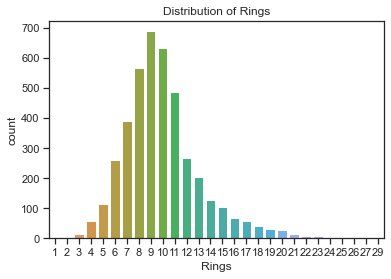

In [251]:
sns.countplot(abalone_data['Rings'])
plt.title('Distribution of Rings')

##### The above plot displays that the maximum number of abalones have Rings in the range 8-10

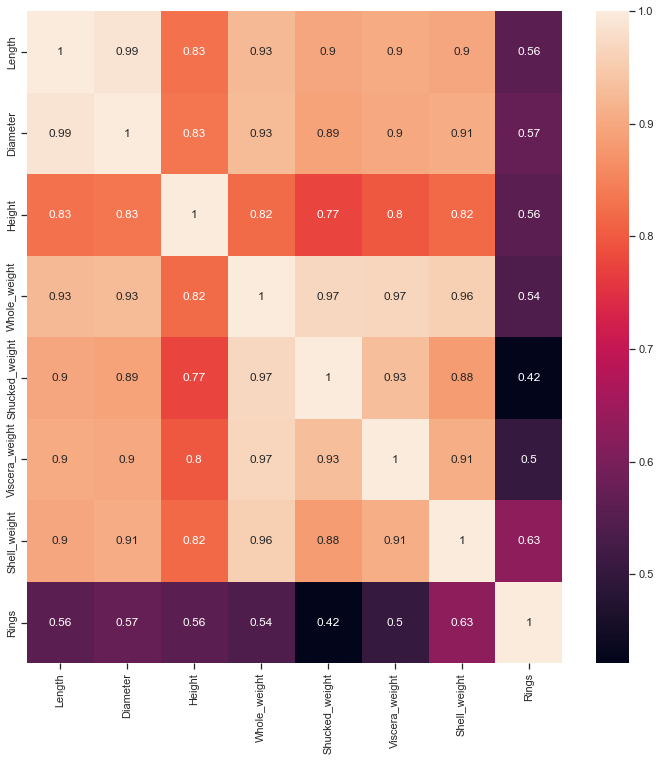

In [252]:
plt.figure(figsize=(12, 12))
corr_matrix = abalone_data.corr()
_ = sns.heatmap(corr_matrix, annot=True)

##### Based on the correlation matrix generated above we can see that the Shell Weight is strongly correlated with the target Variable Rings.

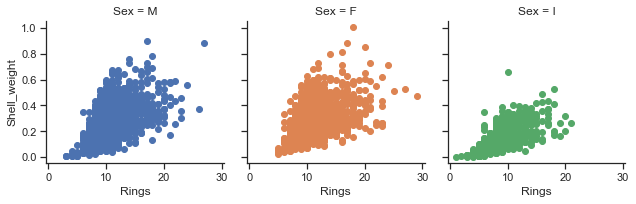

In [253]:
rings_scatter = sns.FacetGrid(abalone_data, col="Sex", hue="Sex")
rings_scatter=rings_scatter.map(plt.scatter,"Rings", "Shell_weight")

##### The purpose of the above plot is to show comparison of rings with shell weight since it has the highest correlation and how does the same compare with different sexes. In infants, we can see a cut off age for Rings i.e around 20. While Male and Female have a similar distribution, males have more visible outliers.

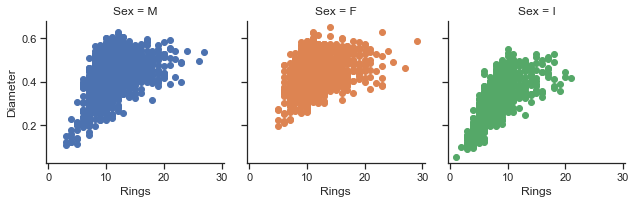

In [254]:
rings_scatter = sns.FacetGrid(abalone_data, col="Sex", hue="Sex")
rings_scatter=rings_scatter.map(plt.scatter,"Rings", "Diameter")

##### The above plot is the comparison with Diameter that is the second higest correlated variable with Rings. We can see that Males and Infants have similar spread of data while in Females the range of Diameter starts from 0.2mm with presence of some outliers.

In [255]:
rings_vs_sex = abalone_data.groupby('Sex')['Rings'].mean()
rings_vs_sex

Sex
F    11.129304
I     7.890462
M    10.705497
Name: Rings, dtype: float64

Text(0, 0.5, 'Mean Rings')

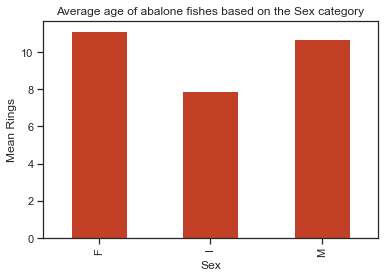

In [256]:
plt.figure()
rings_vs_sex.plot.bar(title='Average age of abalone fishes based on the Sex category',color='#C24026')
plt.xlabel('Sex')
plt.ylabel('Mean Rings')

##### It is clear from the above bar plot that for Infant abalones, the mean of Rings is lower whereas in case of males and females it is almost equal.

### 1(b) Do we have any missing data?

In [257]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

<AxesSubplot:>

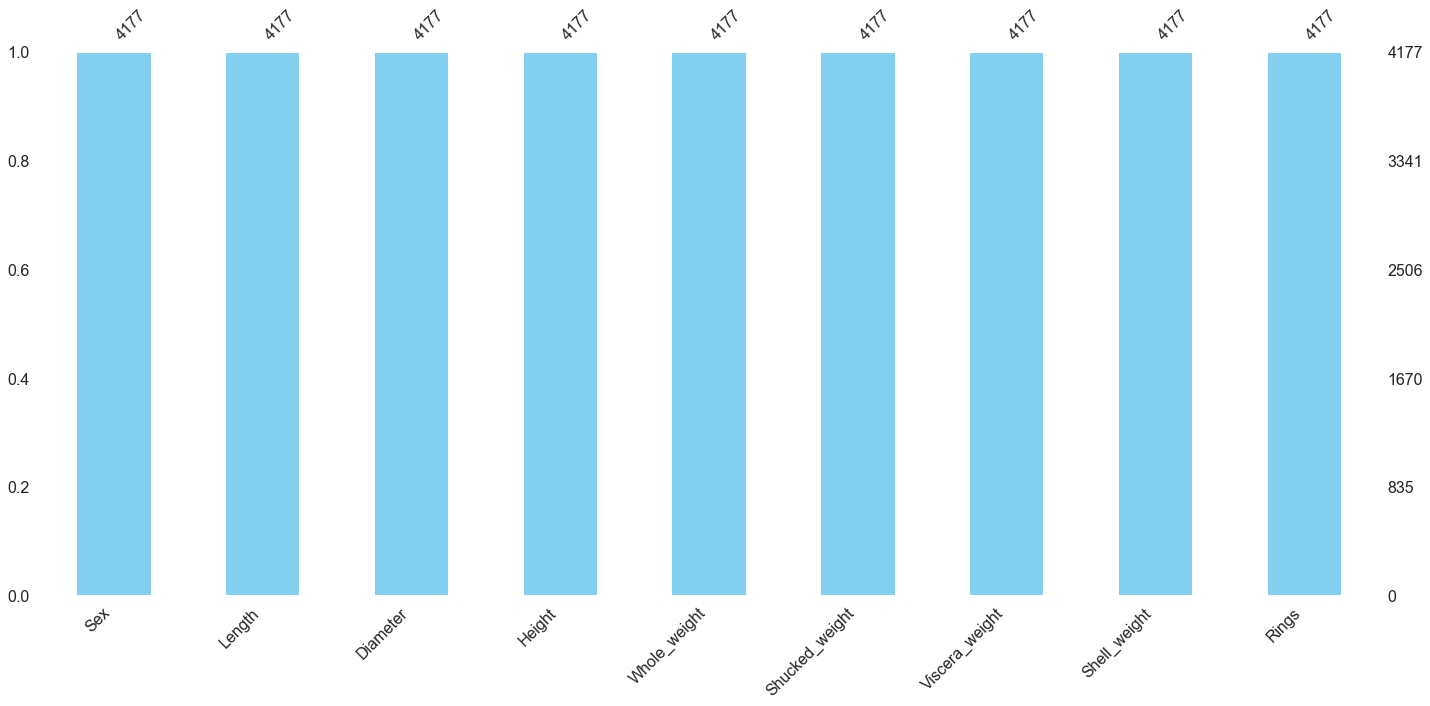

In [258]:
msno.bar(abalone_data,color="#83CFF0")

##### The above plot shows that there are no zeros or null values in the dataset.

### 1(c) Diversity of Data

##### In order to determine if we need to normalize any of the data we can look at the diversity of scales of the features.

In [259]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


##### First we remove the label categories of Sex and Rings.

In [260]:
x = abalone_data.drop(columns=['Sex', 'Rings'])
x.head(10)

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  
5         0.120  
6         0.330  
7         0.260  
8         0.165  
9         0.320

##### We created a boxplot to see the range of possible values for each feature and we can clearly see there is a wide range of scales for the various features.

<AxesSubplot:>

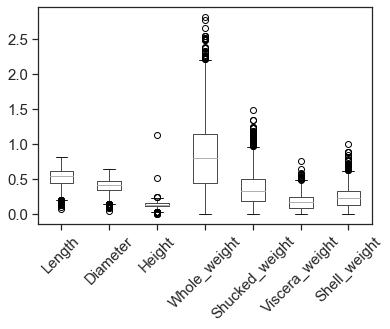

In [261]:
pd.plotting.boxplot(x, grid=False, rot=45, fontsize=15)

##### We see that Whole_weight and Shucked_weight have a much wider range as compared to the other parameters.

In [262]:
x_mod = x.drop(columns=['Shucked_weight','Whole_weight'])

##### Dropping the features Shucked weight and Whole weight and again generating the box plot to check if there are more features that spread over a wider range.

<AxesSubplot:>

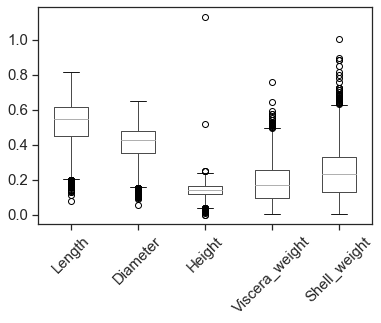

In [263]:
pd.plotting.boxplot(x_mod, grid=False, rot=45, fontsize=15)

##### We can see that the remaining features still have data spread over a large range, hence we need to check for outliers in variables such as Height.

### 1(d) Outliers

In [264]:
abalone_data.describe()

Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

##### From the box plots above,it is very clear that there are outliers in some variables. But, some of the variables such as Whole_weight and Height have mean values of 0.82 and 0.13 respectively and have maximum values as 2.82 and 1.13 respectively. This is a significant difference in the stated values, hence we can check for such values before model classification.

In [265]:
abalone_data['Whole_weight'].describe()

count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: Whole_weight, dtype: float64

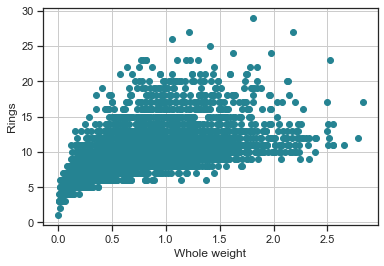

In [266]:
var = 'Whole_weight'
plt.scatter(x = abalone_data[var], y = abalone_data['Rings'], color='#258392')
plt.xlabel("Whole weight")
plt.ylabel("Rings")
plt.grid(True)

##### In the above graph we can observe the presence of outliers in the range (whole_weight > 2.5 and rings > 25).

In [267]:
abalone_data['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

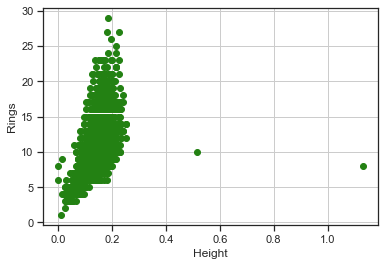

In [268]:
var = 'Height'
plt.scatter(x = abalone_data[var], y = abalone_data['Rings'], color='#238113')
plt.xlabel("Height")
plt.ylabel("Rings")
plt.grid(True)

##### From the above scatter plot, we can very clearly see visible outliers for (height > 0.4 and rings > 25).

In [269]:
abalone_data['Diameter'].describe()

count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

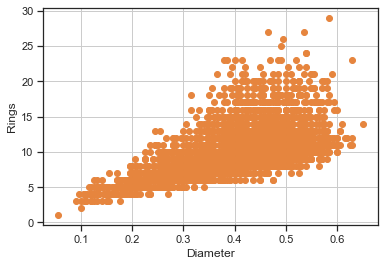

In [270]:
var = 'Diameter'
plt.scatter(x = abalone_data[var], y = abalone_data['Rings'], color='#E6853E')
plt.xlabel("Diameter")
plt.ylabel("Rings")
plt.grid(True)

##### From the above plot we can see values of diameter in the range (diameter > 0.6mm and rings > 23).

##### As per the above exploratory analysis, we can observe that the outliers are naturally occuring but we cannot consider them as errors.

### 1(e) Is our data set balanced?

Text(0.5, 1.0, 'Count of Abalone fishes based on Sex category')

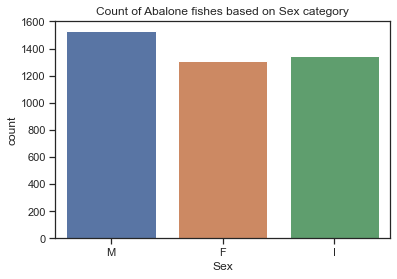

In [271]:
sns.countplot(abalone_data['Sex'])
plt.title('Count of Abalone fishes based on Sex category')

##### We analyzed the count of each sex category (Male, Female and Infant) with a bar plot, and concluded that based on the sex attribute the dataset is balanced.

## 2. Normalization

### 2(a) Is normalization needed?

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole_weight'}>,
        <AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>],
       [<AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

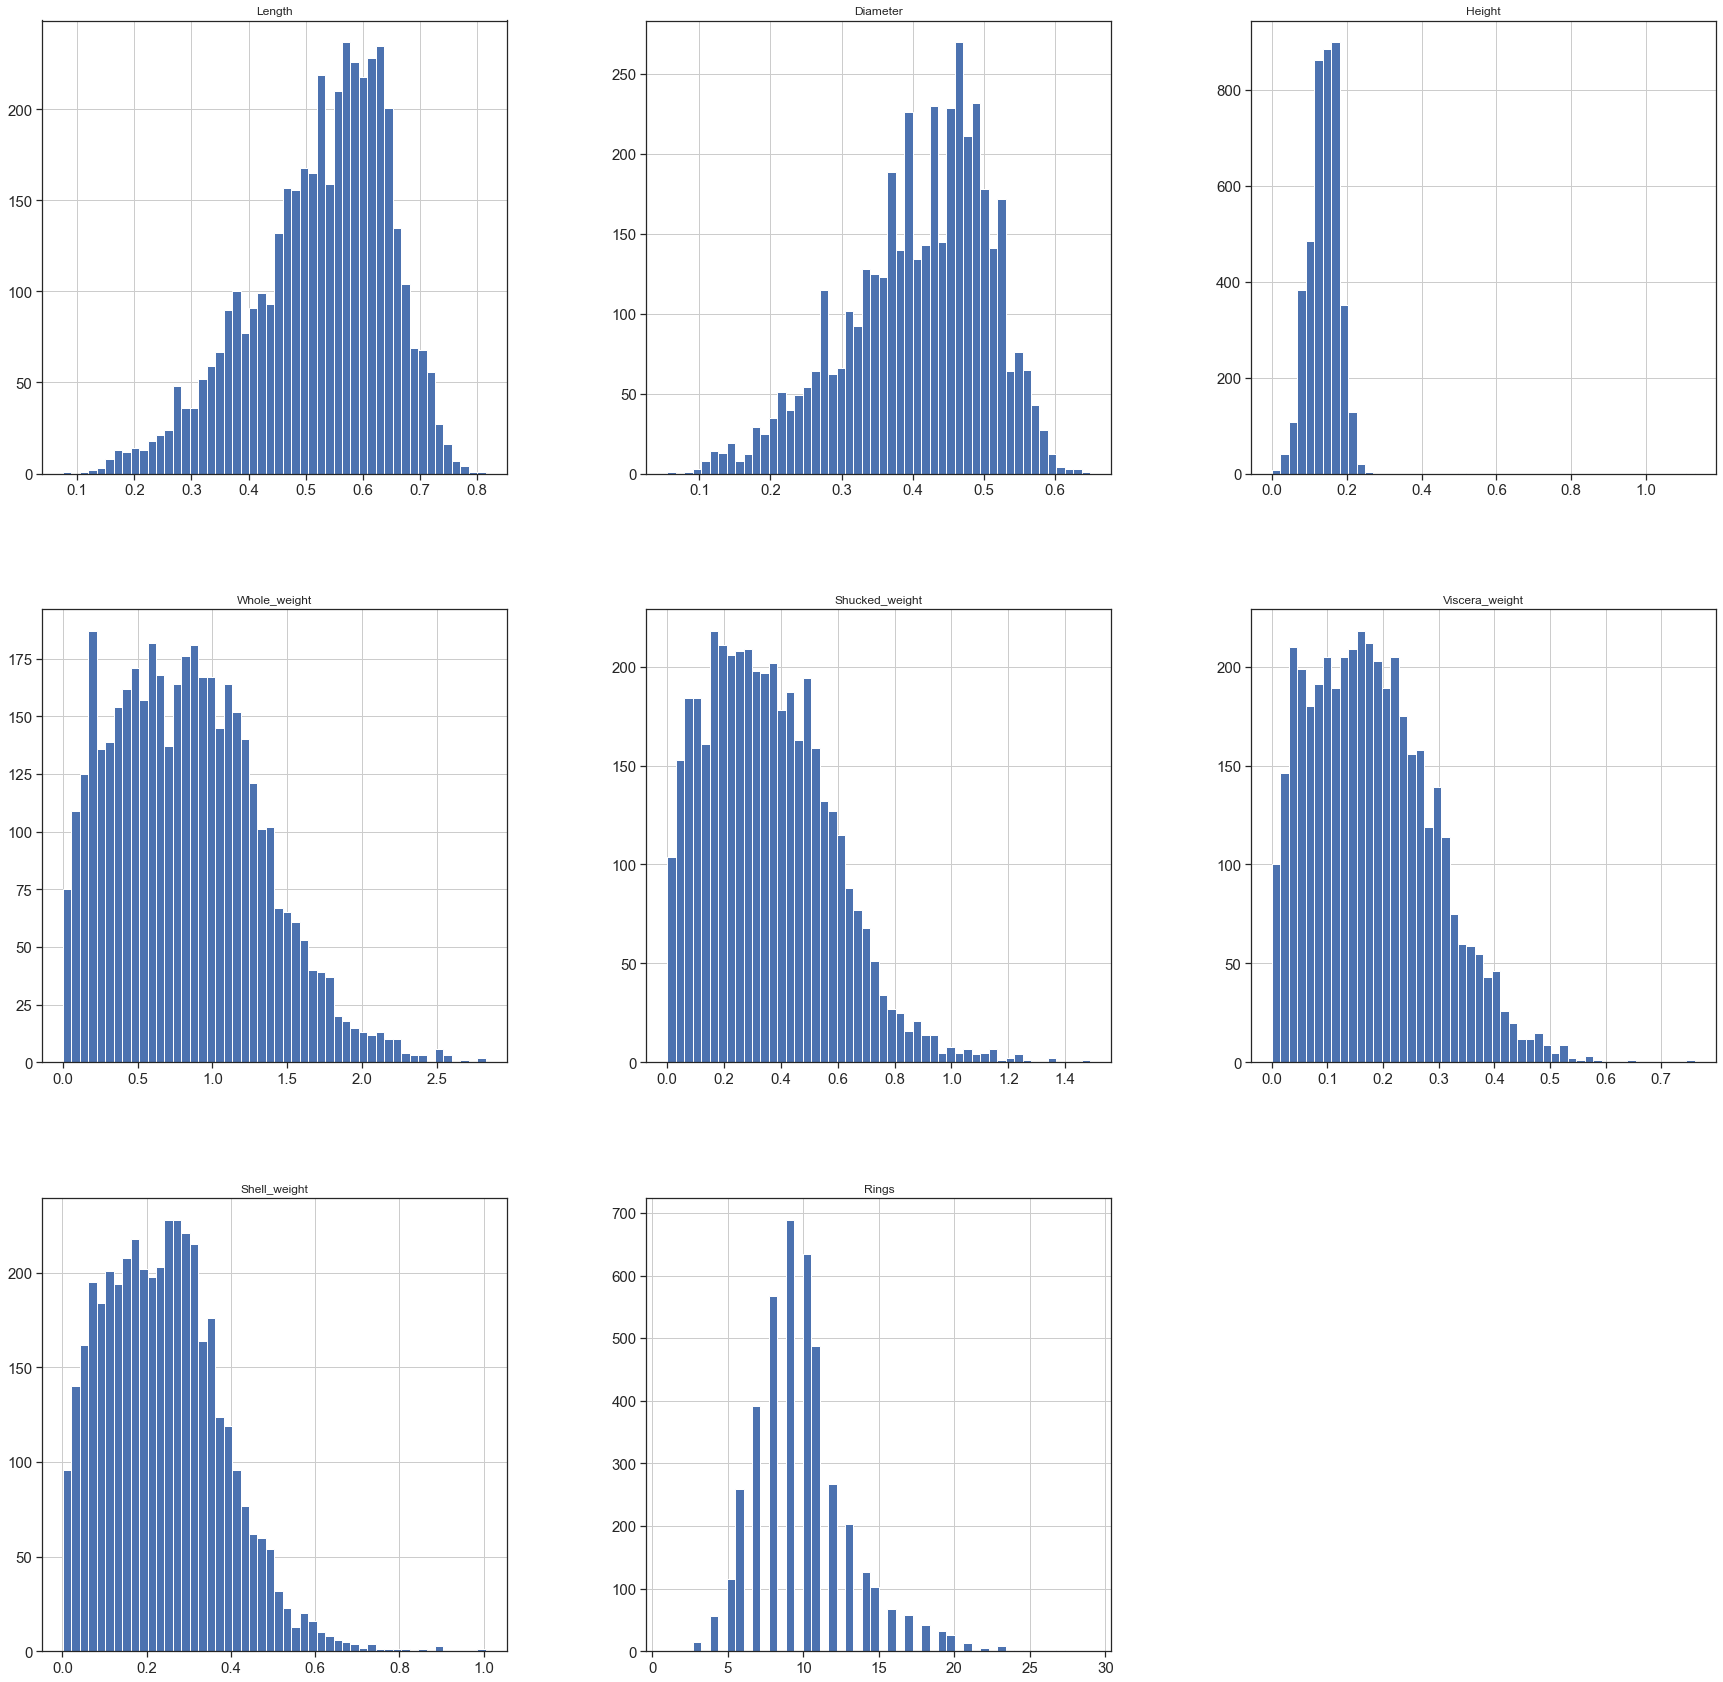

In [272]:
plt.figure()
abalone_data.hist(figsize=(30, 30), bins=50, xlabelsize=15, ylabelsize=15)

##### As it is clearly visible that all the features of the dataset are defined in different range and the data is skewed. Hence, we need to check for skewness for all numerical features of the dataset.

##### Selecting the numerical and categorical variables from the abalone dataset.

In [273]:
numerical_features = abalone_data.select_dtypes(include=[np.number]).columns
categorical_features = abalone_data.select_dtypes(include=[np.object]).columns
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

##### Checking for skewness in all numerical features of the dataset.

In [274]:
skewed_num_features = skew(abalone_data[numerical_features],nan_policy='omit') #sending all numerical features and omitting NaN values
skewed_df = pd.concat([pd.DataFrame(numerical_features,columns=['Features']),pd.DataFrame(skewed_num_features,columns=['Skewness'])],axis = 1)

In [275]:
#Sorting the values of skewness in all features in descending order

skewed_df.sort_values(by='Skewness', ascending = False)

Features  Skewness
2          Height  3.127694
7           Rings  1.113702
4  Shucked_weight  0.718840
6    Shell_weight  0.620704
5  Viscera_weight  0.591640
3    Whole_weight  0.530768
1        Diameter -0.608979
0          Length -0.639643

##### For a normally distributed data skewness should be 0. But according to the skewness values displayed above either the features are positively skewed(skewness > 0) or are negatively skewed(skewness < 0). Hence, according to the above analysis normalization of the dataset is required.

### 2(b,c) Normalizing the dataset using Min-Max normalization and Z-Score Normalization

In [276]:
# Removing the target variable(Rings) from the dataset before normalization

abalone_mod = abalone_data.drop(columns=['Rings'])
abalone_mod.head(10)

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  
5         0.120  
6         0.330  
7         0.260  
8         0.165  
9         0.320

##### Now, we will use One Hot Encoding on our categorical variable(Sex) to convert it into a binary vector representation so that the same can be passed as an input to the classification model.

In [277]:
#Converting the encoded Sex column into 3 different binary columns for M,F and I as 2,0 and 1 respectively

onehot_encoder = OneHotEncoder(handle_unknown = 'ignore')
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(abalone_mod[['Sex']]).toarray())
print(onehot_encoded)

        0    1    2
0     0.0  0.0  1.0
1     0.0  0.0  1.0
2     1.0  0.0  0.0
3     0.0  0.0  1.0
4     0.0  1.0  0.0
...   ...  ...  ...
4172  1.0  0.0  0.0
4173  0.0  0.0  1.0
4174  0.0  0.0  1.0
4175  1.0  0.0  0.0
4176  0.0  0.0  1.0

[4177 rows x 3 columns]


In [278]:
#Appending the 3 new encoded columns with the original dataset

abalone_data_encoded = abalone_mod.join(onehot_encoded)
abalone_data_encoded

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight    0    1    2  
0             0.1010        0.1500  0.0  0.0  1.0  
1             0.0485        0.0700  0.0  0.0  1.0  
2             0.1415        0.2100  1.0  0.0  0.0  
3             0.1140        0.1550  0.0  0.0  1.0  
4             0.0395        0.0550  0.0  1.0  0.0  
...              ...           ...  ...  ...  ...  
4172          0.2390        0.2490  1.0  0.0  0.0  
4173          0.2145        0.2605  0.0  0.0  1.0  
4174          0.2875        0.3080  0.0  0.0  1.0  
4175          0.2610        0.2960  1.0  0.0  0.0  
4176          0.3765        0.4950  0.0  0.0  1.0  

[4177 rows x 11 columns]

In [279]:
#Dropping the Sex column

abalone_data_final = abalone_data_encoded.drop(columns = ['Sex'])
abalone_data_final

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight    0    1    2  
0           0.1500  0.0  0.0  1.0  
1           0.0700  0.0  0.0  1.0  
2           0.2100  1.0  0.0  0.0  
3           0.1550  0.0  0.0  1.0  
4           0.0550  0.0  1.0  0.0  
...            ...  ...  ...  ...  
4172        0.2490  1.0  0.0  0.0  
4173        0.2605  0.0  0.0  1.0  
4174        0.3080  0.0  0.0  1.0  
4175        0.2960  1.0  0.0  0.0  
4176        0.4950  0.0  0.0  1.0  

[4177 rows x 10 columns]

In [280]:
#Renaming the binary encoded columns(0,1 and 2) to Sex_F,Sex_I and Sex_M respectively in the resultant dataset

abalone_df_encoded = abalone_data_final.rename(columns={0:'Sex_F',1:'Sex_I',2:'Sex_M'})
abalone_df_encoded

Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_weight  Sex_F  Sex_I  Sex_M  
0           0.1500    0.0    0.0    1.0  
1           0.0700    0.0    0.0    1.0  
2           0.2100    1.0    0.0    0.0  
3           0.1550    0.0    0.0    1.0  
4           0.0550    0.0    1.0    0.0  
...            ...    ...    ...    ...  
4172        0.2490    1.0    0.0    0.0  
4173        0.2605    0.0    0.0    1.0  
4174        0.3080    0.0    0.0    1.0  
4175        0.2960    1.0    0.0    0.0  
4176        0.4950    0.0    0.0    1.0  

[4177 rows x 10 columns]

##### Finally, after performing One Hot Encoding, we got 3 different columns for the feature Sex in its binary representation. 

In [281]:
abalone_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Sex_F           4177 non-null   float64
 8   Sex_I           4177 non-null   float64
 9   Sex_M           4177 non-null   float64
dtypes: float64(10)
memory usage: 326.5 KB


### Min-Max Normalization

In [282]:
abalone_minmax = (abalone_df_encoded-abalone_df_encoded.min())/(abalone_df_encoded.max()-abalone_df_encoded.min())
display(abalone_minmax.describe())

Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.606746     0.593078     0.123466      0.292808        0.241000   
std       0.162288     0.166790     0.037015      0.173681        0.149269   
min       0.000000     0.000000     0.000000      0.000000        0.000000   
25%       0.506757     0.495798     0.101770      0.155658        0.124412   
50%       0.635135     0.621849     0.123894      0.282451        0.225286   
75%       0.729730     0.714286     0.146018      0.407650        0.336920   
max       1.000000     1.000000     1.000000      1.000000        1.000000   

       Viscera_weight  Shell_weight        Sex_F        Sex_I        Sex_M  
count     4177.000000   4177.000000  4177.000000  4177.000000  4177.000000  
mean         0.237121      0.236503     0.312904     0.321283     0.365813  
std          0.144324      0.138717     0.463731     0.467025     0.481715  
min          0.000000      0.000000     0.000000     0.000000     0.000000  
25%          0.122449      0.128052     0.000000     0.000000     0.000000  
50%          0.224490      0.231689     0.000000     0.000000     0.000000  
75%          0.332456      0.326358     1.000000     1.000000     1.000000  
max          1.000000      1.000000     1.000000     1.000000     1.000000

##### The above are the statistical values of all numerical features of the dataset after min-max normalization.

### Using Z-Score Normalization

In [283]:
abalone_zscore =np.abs(stats.zscore(abalone_df_encoded.select_dtypes(include=[np.number])))
abalone_zscore.describe()

Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.805125     0.809205     0.748047      0.816703        0.808589   
std       0.593176     0.587597     0.663725      0.577128        0.588444   
min       0.008394     0.021352     0.011563      0.000494        0.000597   
25%       0.366361     0.374075     0.347099      0.365586        0.358808   
50%       0.699476     0.684094     0.609334      0.737752        0.722583   
75%       1.132658     1.129911     1.064424      1.180311        1.160839   
max       3.739154     3.556267    23.683287      4.072271        5.085388   

       Viscera_weight  Shell_weight        Sex_F        Sex_I        Sex_M  
count     4177.000000   4177.000000  4177.000000  4177.000000  4177.000000  
mean         0.814336      0.807658     0.927351     0.933939     0.963315  
std          0.580463      0.589722     0.374237     0.357476     0.268407  
min          0.000854      0.001215     0.674834     0.688018     0.759488  
25%          0.354982      0.350832     0.674834     0.688018     0.759488  
50%          0.733627      0.717248     0.674834     0.688018     0.759488  
75%          1.176141      1.166287     1.481846     1.453451     1.316677  
max          5.286500      5.504642     1.481846     1.453451     1.316677

##### The above are the statistical values of all numerical features of the dataset after Z-Score normalization.

### Comparison of 3 features based on normalized and unnormalized data

##### Based on the analysis in the 1(d) Outliers section, we can see that Whole_weight, Height and Diameter were the features in which outliers were visible clearly as comparecd to other features of the dataset. Hence, we can show the comparison of the normalized and unnormalized data of the selected features below:

[Text(0.5, 0, 'Instances'), Text(0, 0.5, 'Values')]

<Figure size 432x288 with 0 Axes>

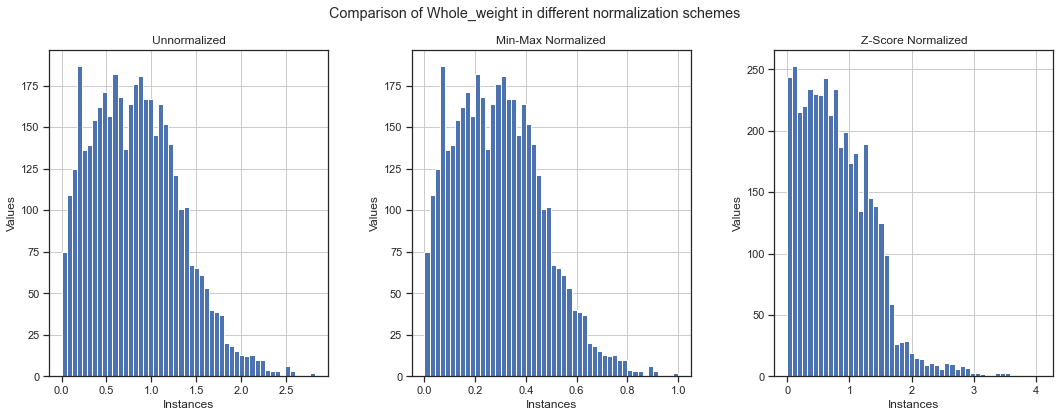

In [284]:
plt.figure()

fig,axes = plt.subplots(1, 3,figsize=(18, 6))

abalone_mod.hist(column = 'Whole_weight', bins = 50,  ax=axes[0])
abalone_minmax.hist(column = 'Whole_weight', bins = 50, ax=axes[1])
abalone_zscore.hist(column = 'Whole_weight', bins = 50, ax=axes[2])

fig.suptitle('Comparison of Whole_weight in different normalization schemes')
axes[0].set_title('Unnormalized')
axes[1].set_title('Min-Max Normalized')
axes[2].set_title('Z-Score Normalized')

axes[0].set(xlabel='Instances', ylabel='Values')
axes[1].set(xlabel='Instances', ylabel='Values')
axes[2].set(xlabel='Instances', ylabel='Values')


[Text(0.5, 0, 'Instances'), Text(0, 0.5, 'Values')]

<Figure size 432x288 with 0 Axes>

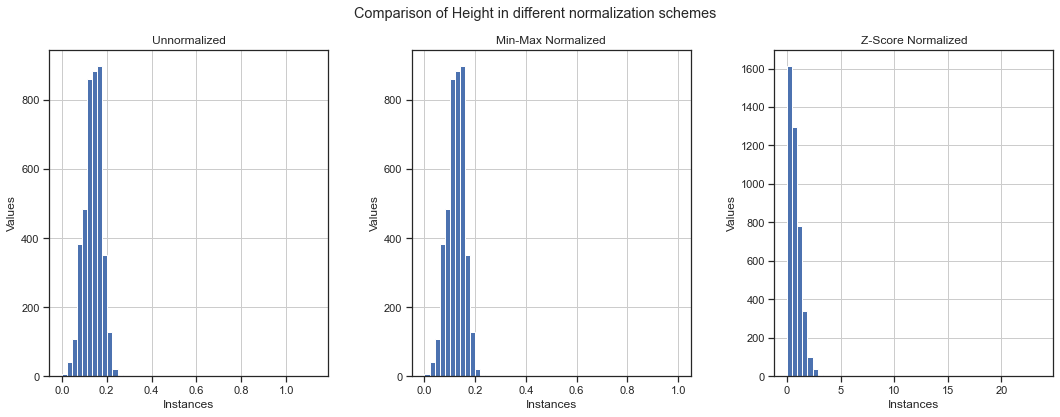

In [285]:
plt.figure()

fig,axes = plt.subplots(1, 3,figsize=(18, 6))

abalone_mod.hist(column = 'Height', bins = 50,  ax=axes[0])
abalone_minmax.hist(column = 'Height', bins = 50, ax=axes[1])
abalone_zscore.hist(column = 'Height', bins = 50, ax=axes[2])

fig.suptitle('Comparison of Height in different normalization schemes')
axes[0].set_title('Unnormalized')
axes[1].set_title('Min-Max Normalized')
axes[2].set_title('Z-Score Normalized')

axes[0].set(xlabel='Instances', ylabel='Values')
axes[1].set(xlabel='Instances', ylabel='Values')
axes[2].set(xlabel='Instances', ylabel='Values')


[Text(0.5, 0, 'Instances'), Text(0, 0.5, 'Values')]

<Figure size 432x288 with 0 Axes>

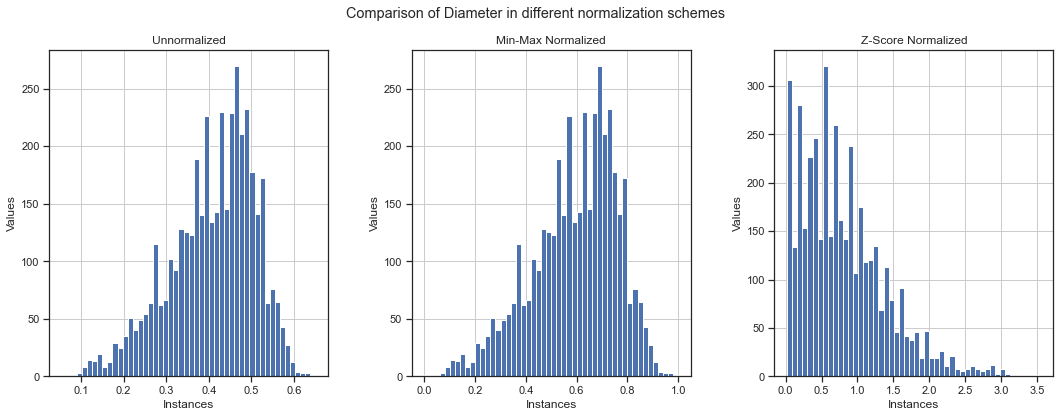

In [286]:
plt.figure()

fig,axes = plt.subplots(1, 3,figsize=(18, 6))

abalone_mod.hist(column = 'Diameter', bins = 50,  ax=axes[0])
abalone_minmax.hist(column = 'Diameter', bins = 50, ax=axes[1])
abalone_zscore.hist(column = 'Diameter', bins = 50, ax=axes[2])

fig.suptitle('Comparison of Diameter in different normalization schemes')
axes[0].set_title('Unnormalized')
axes[1].set_title('Min-Max Normalized')
axes[2].set_title('Z-Score Normalized')

axes[0].set(xlabel='Instances', ylabel='Values')
axes[1].set(xlabel='Instances', ylabel='Values')
axes[2].set(xlabel='Instances', ylabel='Values')


##### From the above comparison we can see that in Min-Max normalization the shape of the curve is preserved, only the scale of the data is confined between 0 and 1. Hence there are no very large differences in the lower and upper values after min-max normalization.
##### Whereas, in Z-Score normalization outliers are handled well but does not produce normalized data with the exact same scale.

## 2 Classification with KNN

### 2(a) Dividing the data into training(80%) and testing(20%) set 

##### Two new objects created: X -> to store the independent variables , y -> to store the dependent variable/target variable

In [287]:
#Performing classification on min-max normalized data

X = abalone_minmax
X = X.values
y = abalone_data["Rings"]
y = y.values

In [288]:
abalone_data["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

##### Splitting the data into training and testing set for model evaluation

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

### 2(b) Training the KNN model with default parameters

In [290]:
knn_model_default = KNeighborsClassifier() # Unfitted model created (by default value of k=5)

##### Fitting the default KNN model with the training data.

In [291]:
knn_model_default.fit(X_train, y_train)

KNeighborsClassifier()

In [292]:
#Checking the accuracy of the default KNN model using test data

knn_test_accuracy = knn_model_default.score(X_test,y_test)
knn_test_accuracy

0.22009569377990432

In [293]:
knn_model = KNeighborsClassifier(n_neighbors=3) # Unfitted model created with k =3
knn_model.fit(X_train, y_train)
knn_test_accuracy = knn_model.score(X_test,y_test)
knn_test_accuracy

0.20095693779904306

##### As shown above, for different values of K the accuracy of the test set changes i.e for K=5 accuracy was around 22% whereas for K=3 the accuracy was around 20%. Hence, we can see that greater the number of neighbours the higher the accuracy score for the model.

### 2(c) Computing the accuracy of the model based on multiple values of k

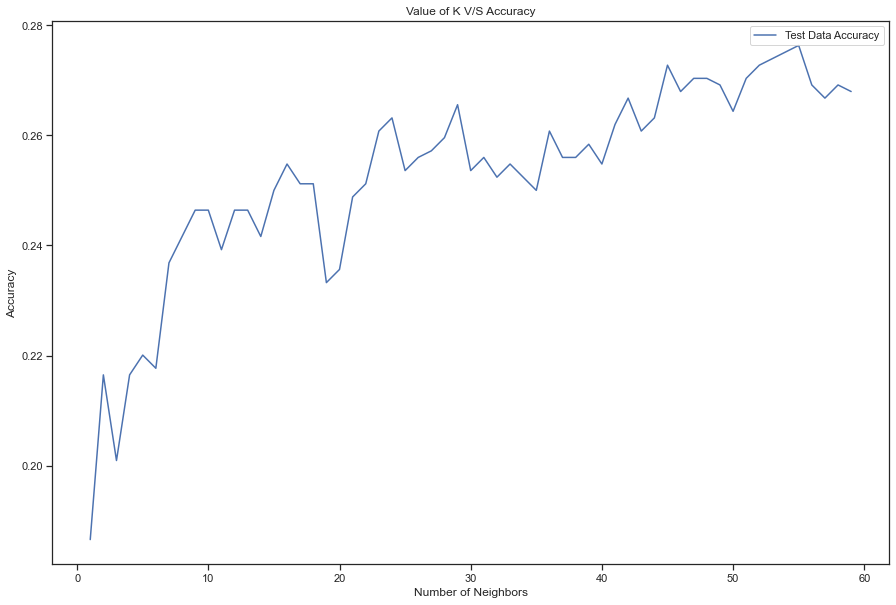

Best Accuracy for testing data is 0.27631578947368424 with K=55


In [294]:
k_neighbors = np.arange(1, 60)
test_accuracy_min= []

for i, j in enumerate(k_neighbors):
    knn_default = KNeighborsClassifier(n_neighbors=j) # Unfitted model with default parameters for the classifier
    knn_default.fit(X_train, y_train) # fitting the model using training data
    predicted_data = knn_default.predict(X_test) # predicting the performance of the test set for each value of k_neighbours
    test_accuracy_min.append(accuracy_score(y_test, predicted_data)) #calculating the accuracy score based on the actual data and predicted data
    
plt.figure(figsize=[15, 10])
plt.plot(k_neighbors, test_accuracy_min, label="Test Data Accuracy")
plt.legend()
plt.title("Value of K V/S Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

print("Best Accuracy for testing data is {} with K={}".format(np.max(test_accuracy_min), 1 + test_accuracy_min.index(np.max(test_accuracy_min))))


##### The visualization adequately shows our accuracy measurements across a range of k values from 1 to 60 for testing data segmentation.In this case, we're trying to maximize our testing accuracy, so we want to grab the value of k where our blue line is at an absolute maximum.

### 2(d) Comparison of different distance metrics using Weighted KNN

##### Let's calculate the accuracy score of different distance metrics and compare it with each other using weighted KNN for min-max normalized data 

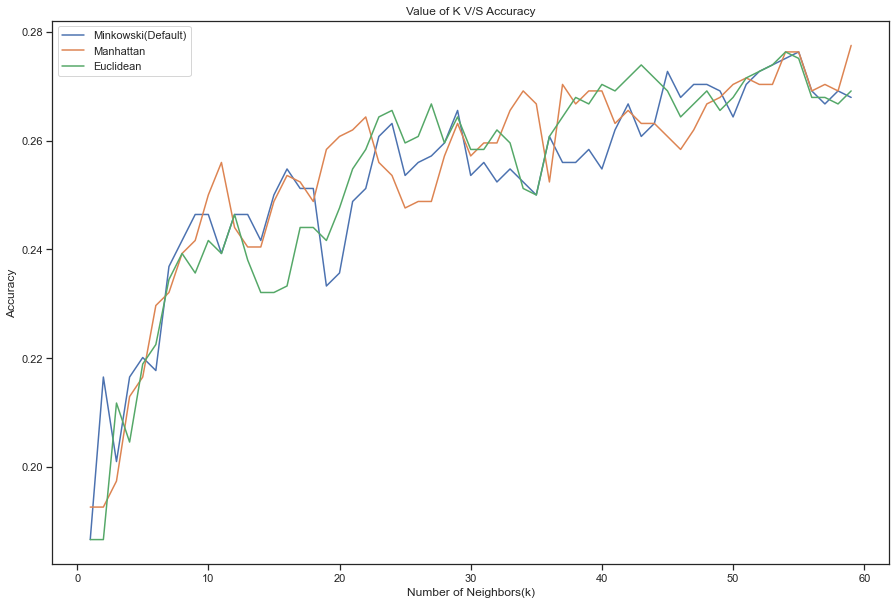

Best Accuracy for Minkowski Distance Metric is 0.27631578947368424 with K=55
Best Accuracy for Manhattan Distance Metric is 0.27751196172248804 with K=59
Best Accuracy for Euclidean Distance Metric is 0.27631578947368424 with K=54


In [295]:
k_neighbors = np.arange(1, 60)
test_accuracy_min = []
test_accuracy_man = []
test_accuracy_euc = []

for i, j in enumerate(k_neighbors):
    knn_min = KNeighborsClassifier(n_neighbors=j) #Unfitted model with default parameters for the classifier
    knn_min.fit(X_train, y_train)
    min_predicted_data = knn_min.predict(X_test)          
    test_accuracy_min.append(accuracy_score(y_test, min_predicted_data))                                                                    

    knn_man = KNeighborsClassifier(n_neighbors=j,weights="distance",p=1) #Unfitted model with distance metric as Manhattan(as p =1) for the classifier
    knn_man.fit(X_train, y_train)
    man_predicted_data = knn_man.predict(X_test)
    test_accuracy_man.append(accuracy_score(y_test, man_predicted_data))

    knn_euc = KNeighborsClassifier(n_neighbors=j,weights="distance",p=2) #Unfitted model with distance metric as Euclidean(as p =2) for the classifier
    knn_euc.fit(X_train, y_train)
    euc_predicted_data = knn_euc.predict(X_test)
    test_accuracy_euc.append(accuracy_score(y_test, euc_predicted_data))


plt.figure(figsize=[15, 10])                                        
plt.plot(k_neighbors, test_accuracy_min, label="Minkowski(Default)")
plt.plot(k_neighbors, test_accuracy_man, label="Manhattan")
plt.plot(k_neighbors, test_accuracy_euc, label="Euclidean")
plt.legend()
plt.title("Value of K V/S Accuracy")
plt.xlabel("Number of Neighbors(k)")
plt.ylabel("Accuracy")
plt.show()

print("Best Accuracy for Minkowski Distance Metric is {} with K={}".format(np.max(test_accuracy_min), 1 + test_accuracy_min.index(np.max(test_accuracy_min))))
print("Best Accuracy for Manhattan Distance Metric is {} with K={}".format(np.max(test_accuracy_man), 1 + test_accuracy_man.index(np.max(test_accuracy_man))))
print("Best Accuracy for Euclidean Distance Metric is {} with K={}".format(np.max(test_accuracy_euc), 1 + test_accuracy_euc.index(np.max(test_accuracy_euc))))

##### From the above plot, we observed that for normalized data using Minkowski distance we got an accuracy of 27.63% (k=55) whereas for Manhattan and Euclidean distance the accuracy is 27.75%(k=59) and 27.63%(k=54) respectively.Accordingly, Manhattan distance metric is giving the best accuracy for normalized data.

### 2(e) Comparison of different distance metrics using Weighted KNN on unnormalized data

##### Now, for unnormalized data , let's repeat the process and calculate the accuracy score of different distance metrics and compare it with each other using weighted KNN  

In [296]:
X_def = abalone_df_encoded #Unnormalized abalone dataset
X_def = X_def.values
y_def = abalone_data["Rings"]
y_def = y_def.values

In [297]:
X_def_train, X_def_test, y_def_train, y_def_test = train_test_split(X_def, y_def, test_size=0.2, random_state=27)

In [298]:
knn_model_def = KNeighborsClassifier()

In [299]:
knn_model_def.fit(X_def_train, y_def_train)

KNeighborsClassifier()

In [300]:
knn_test_accu_def = knn_model_def.score(X_def_test,y_def_test)
knn_test_accu_def

0.2069377990430622

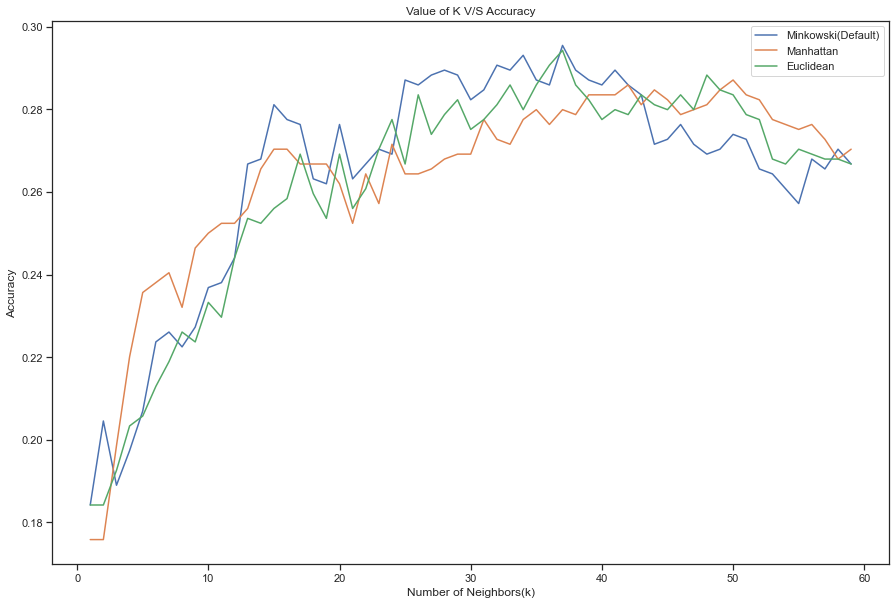

Best Accuracy for Minkowski Distance Metric is 0.29545454545454547 with K=37
Best Accuracy for Manhattan Distance Metric is 0.28708133971291866 with K=50
Best Accuracy for Euclidean Distance Metric is 0.2942583732057416 with K=37


In [301]:
k_neighbors_def = np.arange(1, 60)
test_accuracy_min_def = []
test_accuracy_man_def = []
test_accuracy_euc_def = []

for i, j in enumerate(k_neighbors):
    knn_min_def = KNeighborsClassifier(n_neighbors=j)
    knn_min_def.fit(X_def_train, y_def_train)
    min_predicted_data_def = knn_min_def.predict(X_def_test)
    test_accuracy_min_def.append(accuracy_score(y_def_test, min_predicted_data_def))

    knn_man_def = KNeighborsClassifier(n_neighbors=j,weights="distance",p=1)
    knn_man_def.fit(X_def_train, y_def_train)
    man_predicted_data_def = knn_man_def.predict(X_def_test)
    test_accuracy_man_def.append(accuracy_score(y_def_test, man_predicted_data_def))

    knn_euc_def = KNeighborsClassifier(n_neighbors=j,weights="distance",p=2)
    knn_euc_def.fit(X_def_train, y_def_train)
    euc_predicted_data_def = knn_euc_def.predict(X_def_test)
    test_accuracy_euc_def.append(accuracy_score(y_def_test, euc_predicted_data_def))


plt.figure(figsize=[15, 10])
plt.plot(k_neighbors_def, test_accuracy_min_def, label="Minkowski(Default)")
plt.plot(k_neighbors_def, test_accuracy_man_def, label="Manhattan")
plt.plot(k_neighbors_def, test_accuracy_euc_def, label="Euclidean")
plt.legend()
plt.title("Value of K V/S Accuracy")
plt.xlabel("Number of Neighbors(k)")
plt.ylabel("Accuracy")
plt.show()

print("Best Accuracy for Minkowski Distance Metric is {} with K={}".format(np.max(test_accuracy_min_def), 1 + test_accuracy_min_def.index(np.max(test_accuracy_min_def))))
print("Best Accuracy for Manhattan Distance Metric is {} with K={}".format(np.max(test_accuracy_man_def), 1 + test_accuracy_man_def.index(np.max(test_accuracy_man_def))))
print("Best Accuracy for Euclidean Distance Metric is {} with K={}".format(np.max(test_accuracy_euc_def), 1 + test_accuracy_euc_def.index(np.max(test_accuracy_euc_def))))

##### Based on the analysis performed above on unnormalized and normalized data, the best accuracy for unnormalized data is 29.54% and that with normalized data is 27.75%. We can conclude that normalization did not increase the accuracy of the classification model. Hence, normalization of the abalone dataset was not effective.

## KNN Classification for Wine Dataset

In [445]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]
LC =L +C

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [303]:
wine.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  color  
1594     10.5        5    1.0  
1595     11.2        6    1.0  
1596     11.0        6    1.0  
1597     10.2        5    1.0  
1598     11.0        6    1.0

In [304]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [305]:
print(wine.shape, wine_r.shape, wine_w.shape)

(6497, 13) (1599, 13) (4898, 13)


## Normalization on the wine dataset

##### Dropping the target variable 'quality' before normalizing the dataset

In [306]:
wine_mod=wine.drop(columns=['quality'])
wine_mod

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  color  
0         8.8    0.0  
1         9.5    0.0  
2        10.1    0.0  
3         9.9    0.0  
4         9.9    0.0  
...       ...    ...  
1594     10.5    1.0  
1595     11.2    1.0  
1596     11.0    1.0  
1597     10.2    1.0  
1598     11.0    1.0  

[6497 rows x 12 columns]

In [307]:
# Normalization with zscore
plt.figure()
wine_znormalized = wine_mod.apply(stats.zscore)

<Figure size 432x288 with 0 Axes>

In [308]:
wine_znormalized.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean    1.096552e-16      5.957004e-16 -3.094441e-15   -1.636626e-16   
std     1.000077e+00      1.000077e+00  1.000077e+00    1.000077e+00   
min    -2.634589e+00     -1.577330e+00 -2.192833e+00   -1.018034e+00   
25%    -6.289329e-01     -6.661613e-01 -4.723335e-01   -7.657978e-01   
50%    -1.660892e-01     -3.016939e-01 -5.941375e-02   -5.135612e-01   
75%     3.738951e-01      3.664962e-01  4.911459e-01    5.584445e-01   
max     6.699425e+00      7.534354e+00  9.231281e+00    1.268682e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean   3.358608e-16        -5.712086e-16         -8.278911e-16 -3.146646e-15   
std    1.000077e+00         1.000077e+00          1.000077e+00  1.000077e+00   
min   -1.342639e+00        -1.663583e+00         -1.941780e+00 -2.530192e+00   
25%   -5.147986e-01        -7.620742e-01         -6.855323e-01 -7.859527e-01   
50%   -2.578826e-01        -8.594301e-02          3.990667e-02  6.448888e-02   
75%    2.559494e-01         5.901882e-01          7.122647e-01  7.648525e-01   
max    1.584219e+01         1.456357e+01          5.737257e+00  1.476879e+01   

                 pH     sulphates       alcohol         color  
count  6.497000e+03  6.497000e+03  6.497000e+03  6.497000e+03  
mean   3.027045e-15  8.383149e-16 -1.808824e-15  1.217988e-14  
std    1.000077e+00  1.000077e+00  1.000077e+00  1.000077e+00  
min   -3.100615e+00 -2.091935e+00 -2.089350e+00 -5.713666e-01  
25%   -6.748622e-01 -6.805919e-01 -8.316152e-01 -5.713666e-01  
50%   -5.287424e-02 -1.429373e-01 -1.608231e-01 -5.713666e-01  
75%    6.313125e-01  4.619241e-01  6.776670e-01 -5.713666e-01  
max    4.923029e+00  9.870879e+00  3.696231e+00  1.750190e+00

## Classification with KNN

##### Two new objects created: pred_wine -> to store the independent variables ,target_wine -> to store the dependent variable/target variable

### 2(a) Dividing the data into training(80%) and testing(20%) set 

In [309]:
pred_wine = wine_znormalized
pred_wine = pred_wine.values
target_wine = wine["quality"]
target_wine = target_wine.values

##### Splitting the data into training and testing set for model evaluation

In [310]:
pred_wine_train, pred_wine_test, target_wine_train, target_wine_test = train_test_split(pred_wine, target_wine, test_size=0.2, random_state=27)

### 2(b) Training the KNN model with default parameters

In [311]:
knn_model_wine = KNeighborsClassifier()

##### Fitting the default KNN model with the training data.

In [312]:
knn_model_wine.fit(pred_wine_train, target_wine_train)

KNeighborsClassifier()

In [313]:
#Calculating the accuracy of the test data based on the KNN model fitted with training data

knn_test_acc_org = knn_model_wine.score(pred_wine_test,target_wine_test)
knn_test_acc_org

0.56

In [314]:
knn_model_mod = KNeighborsClassifier(n_neighbors=3) # Unfitted model created with k =3
knn_model_mod.fit(pred_wine_train, target_wine_train)
knn_test_accuracy_wine = knn_model_mod.score(pred_wine_test,target_wine_test)
knn_test_accuracy_wine

0.5461538461538461

##### As shown above, for different values of K the accuracy of the test set changes i.e for K=5 accuracy was around 56% whereas for K=3 the accuracy was around 54.62%.Hence, we can see that greater the number of neighbours the higher the accuracy score for the model.

### 2(c) Computing the accuracy of the model based on multiple values of k

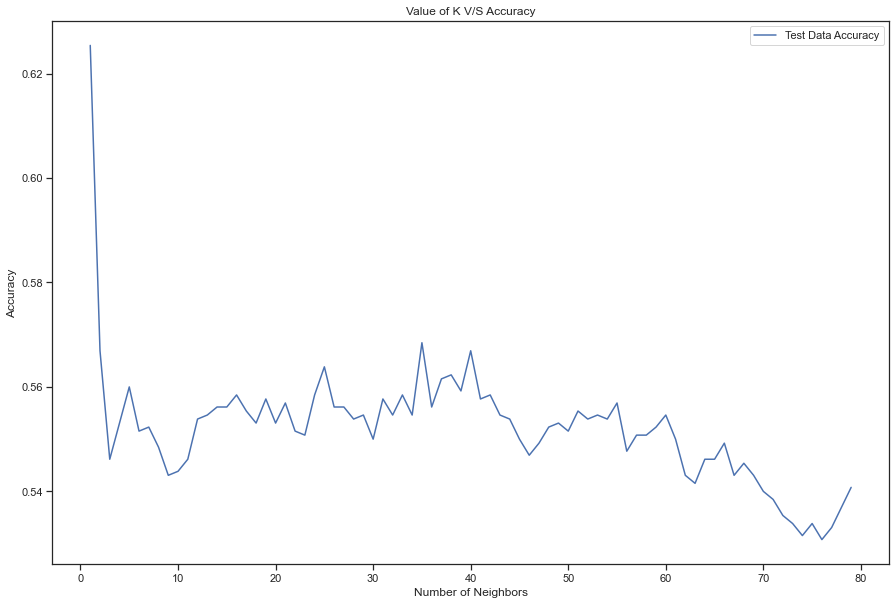

Best Accuracy for testing data is 0.6253846153846154 with K=1


In [315]:
k_neighbors_wine = np.arange(1, 80)
test_accuracy_min_wine= []

for i, j in enumerate(k_neighbors_wine):
    knn_default = KNeighborsClassifier(n_neighbors=j)
    knn_default.fit(pred_wine_train, target_wine_train)
    predicted_data_wine = knn_default.predict(pred_wine_test)
    test_accuracy_min_wine.append(accuracy_score(target_wine_test, predicted_data_wine))
    
plt.figure(figsize=[15, 10])
plt.plot(k_neighbors_wine, test_accuracy_min_wine, label="Test Data Accuracy")
plt.legend()
plt.title("Value of K V/S Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

print("Best Accuracy for testing data is {} with K={}".format(np.max(test_accuracy_min_wine), 1 + test_accuracy_min_wine.index(np.max(test_accuracy_min_wine))))

##### The visualization adequately shows our accuracy measurements across a range of k values from 1 to 80 for testing data segmentation.In this case, we're trying to maximize our testing accuracy, so that the value of k is at absolute maximum.

### 2(d) Comparison of different distance metrics using Weighted KNN

##### Let's calculate the accuracy score of different distance metrics and compare it with each other using weighted KNN for Z-score normalized data 

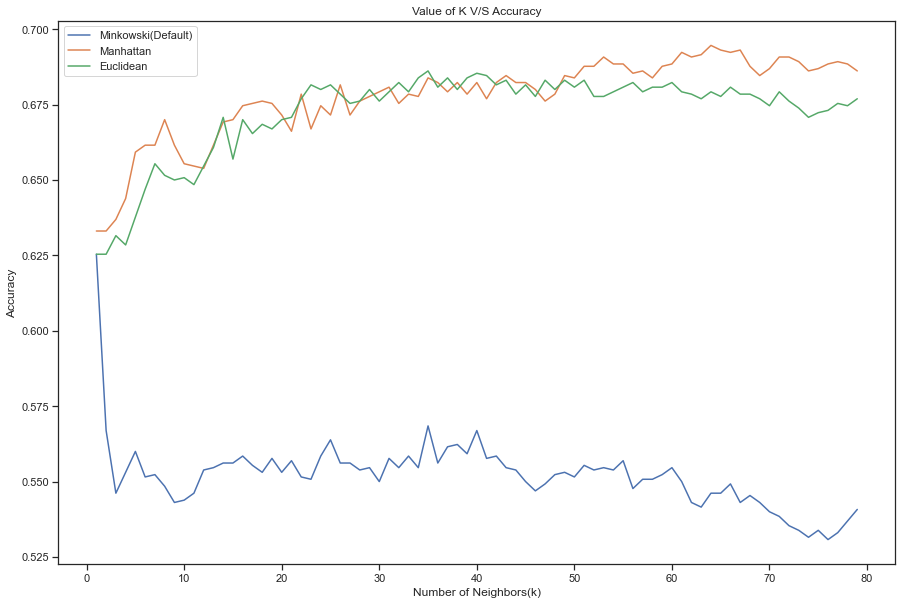

Best Accuracy for Minkowski Distance Metric is 0.6253846153846154 with K=1
Best Accuracy for Manhattan Distance Metric is 0.6946153846153846 with K=64
Best Accuracy for Euclidean Distance Metric is 0.6861538461538461 with K=35


In [316]:
k_neighbors_wine = np.arange(1, 80)
test_accuracy_min_wine = []
test_accuracy_man_wine = []
test_accuracy_euc_wine = []

for i, j in enumerate(k_neighbors_wine):
    knn_min_wine = KNeighborsClassifier(n_neighbors=j)
    knn_min_wine.fit(pred_wine_train, target_wine_train)
    min_predicted_data_wine = knn_min_wine.predict(pred_wine_test)          
    test_accuracy_min_wine.append(accuracy_score(target_wine_test, min_predicted_data_wine))                                                                    

    knn_man_wine = KNeighborsClassifier(n_neighbors=j,weights="distance",p=1)
    knn_man_wine.fit(pred_wine_train, target_wine_train)
    man_predicted_data_wine = knn_man_wine.predict(pred_wine_test)
    test_accuracy_man_wine.append(accuracy_score(target_wine_test, man_predicted_data_wine))

    knn_euc_wine = KNeighborsClassifier(n_neighbors=j,weights="distance",p=2)
    knn_euc_wine.fit(pred_wine_train, target_wine_train)
    euc_predicted_data_wine = knn_euc_wine.predict(pred_wine_test)
    test_accuracy_euc_wine.append(accuracy_score(target_wine_test, euc_predicted_data_wine))


plt.figure(figsize=[15, 10])                                        
plt.plot(k_neighbors_wine, test_accuracy_min_wine,label="Minkowski(Default)")
plt.plot(k_neighbors_wine, test_accuracy_man_wine,label="Manhattan")
plt.plot(k_neighbors_wine, test_accuracy_euc_wine, label="Euclidean")
plt.legend()
plt.title("Value of K V/S Accuracy")
plt.xlabel("Number of Neighbors(k)")
plt.ylabel("Accuracy")
plt.show()

print("Best Accuracy for Minkowski Distance Metric is {} with K={}".format(np.max(test_accuracy_min_wine), 1 + test_accuracy_min_wine.index(np.max(test_accuracy_min_wine))))
print("Best Accuracy for Manhattan Distance Metric is {} with K={}".format(np.max(test_accuracy_man_wine), 1 + test_accuracy_man_wine.index(np.max(test_accuracy_man_wine))))
print("Best Accuracy for Euclidean Distance Metric is {} with K={}".format(np.max(test_accuracy_euc_wine), 1 + test_accuracy_euc_wine.index(np.max(test_accuracy_euc_wine))))

##### From the above plot, we observed that for normalized data using Minkowski distance we got an accuracy of 62.5% (k=1) whereas for Manhattan and Euclidean distance the accuracy is 69.07%(k=53) and 68.6%(k=35) respectively.Accordingly, Manhattan distance metric is giving the best accuracy for normalized data.

### 2(e) Comparison of different distance metrics using Weighted KNN on unnormalized data

##### Now, for unnormalized data , let's repeat the process and calculate the accuracy score of different distance metrics and compare it with each other using weighted KNN 

In [317]:
wine_dataset = wine.drop(columns=['quality'])
wine_dataset.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  color  
0      8.8    0.0  
1      9.5    0.0  
2     10.1    0.0  
3      9.9    0.0  
4      9.9    0.0  
5     10.1    0.0  
6      9.6    0.0  
7      8.8    0.0  
8      9.5    0.0  
9     11.0    0.0

In [318]:
pred_def_wine = wine_dataset
pred_def_wine = pred_def_wine.values
target_def_wine = wine["quality"]
target_def_wine = target_def_wine.values

In [319]:
pred_def_wine_train, pred_def_wine_test, target_def_wine_train, target_def_wine_test = train_test_split(pred_def_wine, target_def_wine, test_size=0.2, random_state=27)

In [320]:
knn_model_org_wine = KNeighborsClassifier()

In [321]:
knn_model_org_wine.fit(pred_def_wine_train, target_def_wine_train)

KNeighborsClassifier()

In [322]:
knn_test_accu_org_wine = knn_model_org_wine.score(pred_def_wine_test,target_def_wine_test)
knn_test_accu_org_wine

0.4753846153846154

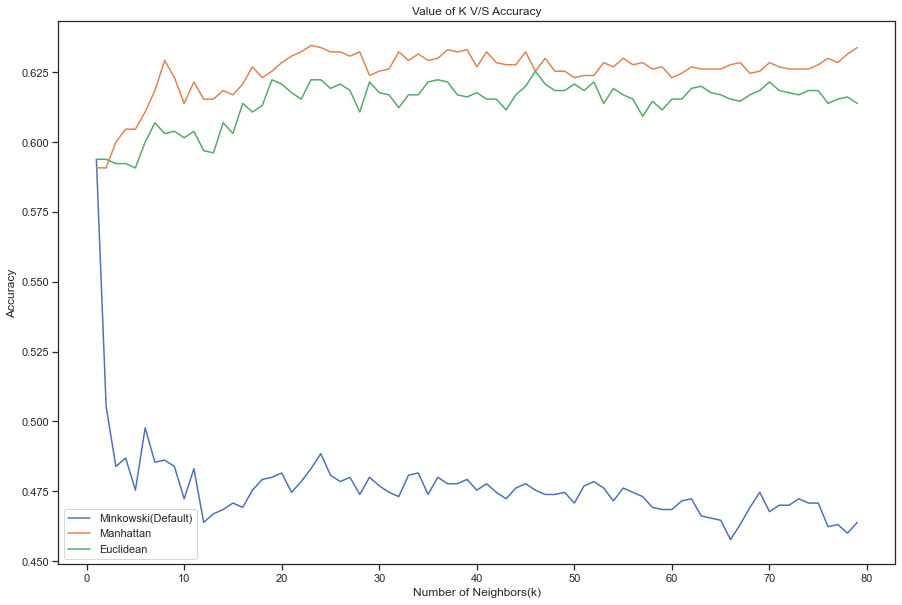

Best Accuracy for Minkowski Distance Metric is 0.5938461538461538 with K=1
Best Accuracy for Manhattan Distance Metric is 0.6346153846153846 with K=23
Best Accuracy for Euclidean Distance Metric is 0.6253846153846154 with K=46


In [323]:
k_neighbors_def_wine = np.arange(1, 80)
test_accuracy_min_def_wine = []
test_accuracy_man_def_wine = []
test_accuracy_euc_def_wine = []

for i, j in enumerate(k_neighbors_def_wine):
    knn_min_def_wine = KNeighborsClassifier(n_neighbors=j)
    knn_min_def_wine.fit(pred_def_wine_train, target_def_wine_train)
    min_predicted_data_def_wine = knn_min_def_wine.predict(pred_def_wine_test)
    test_accuracy_min_def_wine.append(accuracy_score(target_def_wine_test, min_predicted_data_def_wine))

    knn_man_def_wine = KNeighborsClassifier(n_neighbors=j,weights="distance",p=1)
    knn_man_def_wine.fit(pred_def_wine_train, target_def_wine_train)
    man_predicted_data_def_wine = knn_man_def_wine.predict(pred_def_wine_test)
    test_accuracy_man_def_wine.append(accuracy_score(target_def_wine_test, man_predicted_data_def_wine))

    knn_euc_def_wine = KNeighborsClassifier(n_neighbors=j,weights="distance",p=2)
    knn_euc_def_wine.fit(pred_def_wine_train, target_def_wine_train)
    euc_predicted_data_def_wine = knn_euc_def_wine.predict(pred_def_wine_test)
    test_accuracy_euc_def_wine.append(accuracy_score(target_def_wine_test, euc_predicted_data_def_wine))


plt.figure(figsize=[15, 10])
plt.plot(k_neighbors_def_wine, test_accuracy_min_def_wine,label="Minkowski(Default)")
plt.plot(k_neighbors_def_wine, test_accuracy_man_def_wine, label="Manhattan")
plt.plot(k_neighbors_def_wine, test_accuracy_euc_def_wine, label="Euclidean")
plt.legend()
plt.title("Value of K V/S Accuracy")
plt.xlabel("Number of Neighbors(k)")
plt.ylabel("Accuracy")
plt.show()

print("Best Accuracy for Minkowski Distance Metric is {} with K={}".format(np.max(test_accuracy_min_def_wine), 1 + test_accuracy_min_def_wine.index(np.max(test_accuracy_min_def_wine))))
print("Best Accuracy for Manhattan Distance Metric is {} with K={}".format(np.max(test_accuracy_man_def_wine), 1 + test_accuracy_man_def_wine.index(np.max(test_accuracy_man_def_wine))))
print("Best Accuracy for Euclidean Distance Metric is {} with K={}".format(np.max(test_accuracy_euc_def_wine), 1 + test_accuracy_euc_def_wine.index(np.max(test_accuracy_euc_def_wine))))

##### Based on the analysis performed above on unnormalized and normalized data, the best accuracy with for unnormalized data is 63.46% and that with normalized data is 69.46%.We can conclude that normalization did increase the accuracy of the classification model. Hence, normalization of the wine dataset was effective.

# Representation Learning

After performing the classification on Abalone and Wine Dataset we will now perform <b>Dimensionality Reduction</b> using various techniques on both the datasets and observe the differences in the new reduced dimensional datasets from the old one.

For the abalone dataset we will be using the normalized datasets for dimensionality reduction since the features will be scaled to a common range and hence the plotting in a 2-D plane will be easy to explain the variance in the datasets.

## 1 (a) Dimensionality reduction on Abalone and Wine Datasets


### Abalone PCA

Applying Principal Component Analysis on min-max normalized abalone dataset(X) by reducing the features in the two lowest dimensions.

In [324]:
def dimension_reduction(model,X_pred,y_target,params):
    if y_target != '':
        model_output =  model(n_components = params).fit_transform(X_pred,y_target)
    else:
         model_output = model(n_components = params).fit_transform(X_pred)
    return model_output

In [325]:
#Performing dimensionality reduction using PCA
#X -> Independent Features of Abalone min-max normalized dataset
#y -> Dependent Variable(Rings)

x_pca_abalone = dimension_reduction(PCA,X,'',2)
abalone_pca = pd.DataFrame(data = x_pca_abalone, columns = ['PCA 1','PCA 2'])
abalone_pca

PCA 1     PCA 2
0    -0.387020 -0.620348
1    -0.274093 -0.655705
2    -0.165880  0.784021
3    -0.387042 -0.620299
4     0.966840 -0.170123
...        ...       ...
4172 -0.237551  0.806099
4173 -0.538704 -0.573345
4174 -0.600479 -0.554256
4175 -0.305614  0.826834
4176 -0.796448 -0.494652

[4177 rows x 2 columns]

In [326]:
#Original Dataset Dimensions
X.shape

(4177, 10)

In [327]:
# Dataset dimensions after performing PCA
x_pca_abalone.shape

(4177, 2)

<b>From the above analysis , we can see that the features of abalone dataset has been reduced from 10 to 2 after performing PCA on the whole dataset.</b>

### Abalone LDA

Applying Linear Discriminant Analysis on min-max normalized abalone dataset(X) by reducing the features in the two lowest dimensions.

In [328]:
x_lda_abalone = dimension_reduction(LinearDiscriminantAnalysis,X,y,2)

abalone_lda = pd.DataFrame(data = x_lda_abalone, columns = ['LDA 1','LDA 2'])
abalone_lda

LDA 1     LDA 2
0    -0.407959  0.230925
1    -1.837047 -0.361837
2     0.960864  0.202509
3    -0.274973 -0.096006
4    -2.925191 -0.523997
...        ...       ...
4172  1.021066  0.575918
4173  0.683456  0.905941
4174  1.163419  0.415442
4175  0.947552  1.470735
4176  0.857714 -0.327288

[4177 rows x 2 columns]

In [329]:
x_lda_abalone.shape

(4177, 2)

<b>From the above analysis , we can see that the features of abalone dataset has been reduced from 10 to 2 after performing LDA on the whole dataset.</b>

### Abalone t-SNE

Applying t-Distributed Stochastic Neighbor Embedding on min-max normalized abalone dataset(X) by reducing the features in the two lowest dimensions.

In [330]:
x_tsne_abalone = dimension_reduction(TSNE,X,'',2)
x_tsne_abalone

array([[-14.525677, -24.309416],
       [ 20.178587, -68.14744 ],
       [ -8.190938,  25.101719],
       ...,
       [-48.21081 ,  27.420422],
       [ 23.477222,  12.714745],
       [-24.909721,  58.11923 ]], dtype=float32)

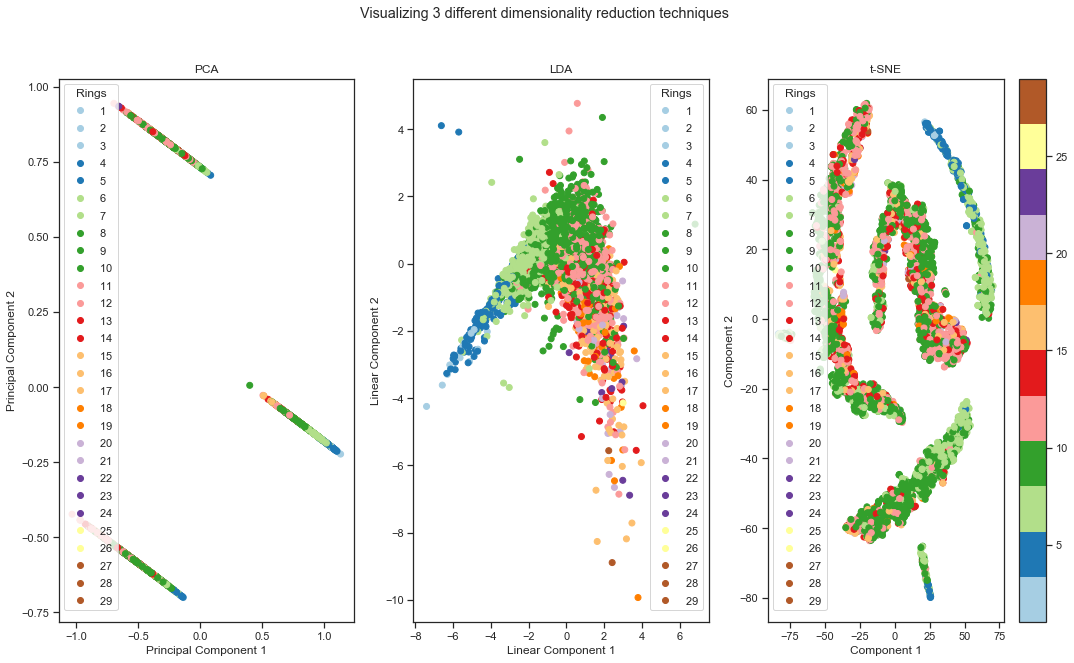

In [331]:
from pylab import *

plt.figure(figsize=(18,10))
subplot(1,3,1)
title("PCA")
scatter_pca = plt.scatter(x_pca_abalone[:,0],x_pca_abalone[:,1],c=y,cmap='Paired')
handles,labels= scatter_pca.legend_elements(num=len(abalone_data['Rings'].unique()))
plt.legend(handles,labels,title='Rings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

subplot(1,3,2)
title("LDA")
scatter_lda = plt.scatter(x_lda_abalone[:,0],x_lda_abalone[:,1],c=y,cmap='Paired')
handles, labels = scatter_lda.legend_elements(num=len(abalone_data['Rings'].unique()))
plt.legend(handles,labels,title='Rings')
plt.xlabel('Linear Component 1')
plt.ylabel('Linear Component 2')

subplot(1,3,3)
title("t-SNE")
scatter_tsne = plt.scatter(x_tsne_abalone[:,0],x_tsne_abalone[:,1],c=y,cmap='Paired')
handles, labels = scatter_tsne.legend_elements(num=len(abalone_data['Rings'].unique()))
plt.legend(handles,labels,title='Rings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.suptitle('Visualizing 3 different dimensionality reduction techniques')
plt.colorbar()

### Wine PCA

In [332]:
#Performing dimensionality reduction using PCA
#pred_wine -> Independent Variables of the Z-normalized Wine Dataset
#target_wine -> Dependent Variable(Quality)

x_pca_wine = dimension_reduction(PCA,pred_wine,'',2)

wine_pca = pd.DataFrame(data = x_pca_wine, columns = ['PCA 1','PCA 2'])
wine_pca

PCA 1     PCA 2
0    -2.185179  3.529983
1    -0.247707 -0.553177
2    -0.380592  0.365447
3    -1.735882  0.929351
4    -1.735882  0.929351
...        ...       ...
6492  2.699833 -0.854172
6493  2.524458 -1.161039
6494  2.775507 -0.761733
6495  2.984356 -0.767021
6496  1.852698 -0.516246

[6497 rows x 2 columns]

### Wine LDA

In [333]:
x_lda_wine = dimension_reduction(LinearDiscriminantAnalysis,pred_wine,target_wine,2)

wine_lda = pd.DataFrame(data = x_lda_wine, columns = ['LDA 1','LDA 2'])
wine_lda

LDA 1     LDA 2
0     0.752078 -1.466209
1     1.445150  0.392049
2    -0.123015  0.911451
3     0.288961 -0.721769
4     0.288961 -0.721769
...        ...       ...
6492  0.512278 -0.224430
6493 -0.514707 -0.597340
6494 -0.231160 -0.831907
6495  0.630811  0.158871
6496 -0.668993 -2.296580

[6497 rows x 2 columns]

### Wine t-SNE

In [334]:
x_tsne_wine = dimension_reduction(TSNE,pred_wine,'',2)
x_tsne_wine

array([[-86.725044 , -20.337828 ],
       [ -3.9272938,   9.416718 ],
       [-23.399916 , -32.618645 ],
       ...,
       [ 75.265465 ,  34.97523  ],
       [ 77.079445 ,  31.20578  ],
       [ 38.619663 ,  74.59681  ]], dtype=float32)

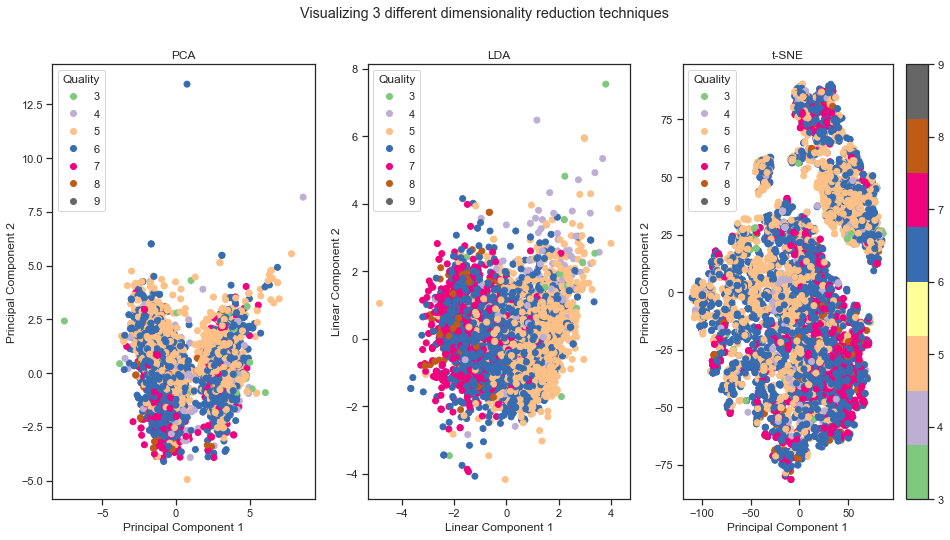

In [335]:
from pylab import *

plt.figure(figsize=(16,8))
subplot(1,3,1)
title("PCA")
scatter_pca = plt.scatter(x_pca_wine[:,0],x_pca_wine[:,1],c=target_wine,cmap='Accent')
handles, labels = scatter_pca.legend_elements()
plt.legend(handles,labels,title='Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

subplot(1,3,2)
title("LDA")
scatter_lda = plt.scatter(x_lda_wine[:,0],x_lda_wine[:,1],c=target_wine,cmap='Accent')
handles, labels = scatter_lda.legend_elements()
plt.legend(handles,labels,title='Quality')
plt.xlabel('Linear Component 1')
plt.ylabel('Linear Component 2')

subplot(1,3,3)
title("t-SNE")
scatter_tsne = plt.scatter(x_tsne_wine[:,0],x_tsne_wine[:,1],c=target_wine,cmap='Accent')
handles, labels = scatter_tsne.legend_elements()
plt.legend(handles,labels,title='Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.suptitle('Visualizing 3 different dimensionality reduction techniques')
plt.colorbar()

## 1 (b) Scree-plot to visualize cumulative variance

### Abalone Dataset

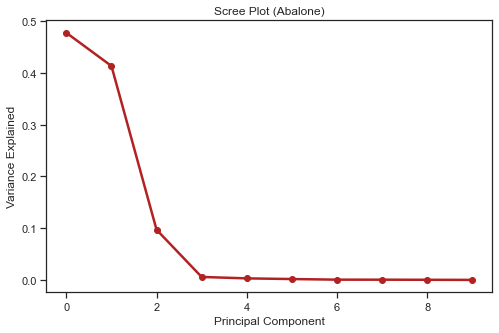

In [336]:
# X -> min-max normalized abalone dataset , y -> target variable(Rings)
pca_plot_aba = PCA().fit(X)

plt.figure(figsize=(8,5))
plt.plot(pca_plot_aba.explained_variance_ratio_,'o-',linewidth=2.5, color='firebrick')
plt.title('Scree Plot (Abalone)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### Wine dataset

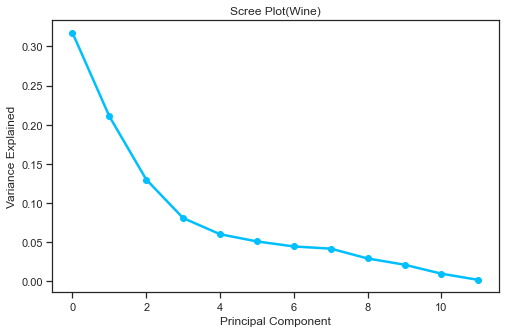

In [337]:
# wine_znormalized -> Z-score normalized wine dataset , target_wine -> target variable(Quality)

pca_plot_wine = PCA().fit(wine_znormalized)

plt.figure(figsize=(8,5))
plt.plot(pca_plot_wine.explained_variance_ratio_,'o-',linewidth=2.5, color='deepskyblue')
plt.title('Scree Plot(Wine)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## 1 (c) Visualizing KNN accuracy of the model based on PCA

### Abalone Dataset

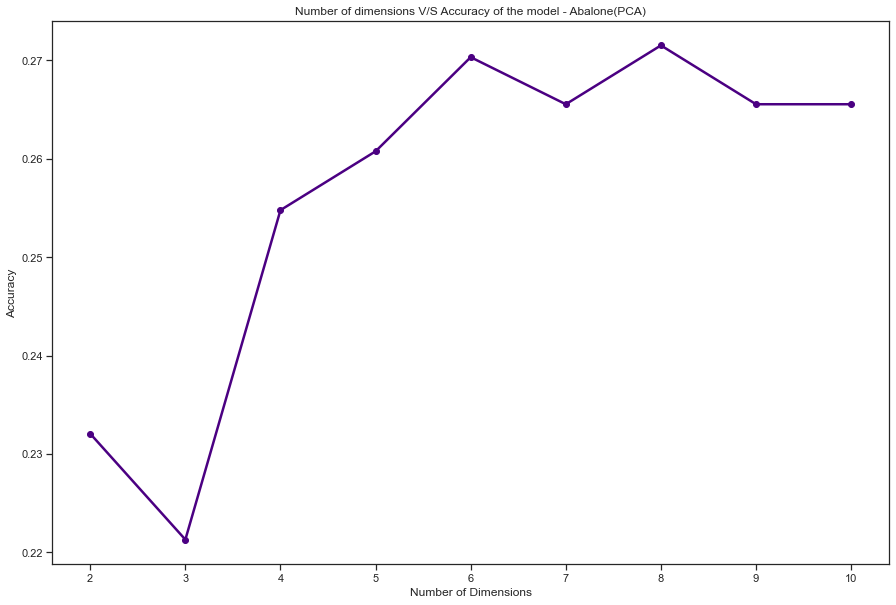

Best Accuracy for for the model is 0.2715311004784689 with dimensions = 8


In [338]:
n_dimensions = np.arange(2, 11)
test_accuracy_aba_pca = []

for i, j in enumerate(n_dimensions):
    
    pca = PCA(n_components = j)
    x_pca_abalone = pca.fit_transform(abalone_minmax)
    X_train, X_test, y_train, y_test = train_test_split(x_pca_abalone, y, test_size=0.2, random_state=27)
    
    knn_man = KNeighborsClassifier(n_neighbors=59,weights="distance",p=1) #Unfitted model with distance metric as Manhattan(as p =1) for the classifier
    knn_man.fit(X_train, y_train)
    man_predicted_data = knn_man.predict(X_test)
    test_accuracy_aba_pca.append(accuracy_score(y_test, man_predicted_data))
    #print('Test accuracy for d = {} is {}'.format(j,test_accuracy_man))


plt.figure(figsize=[15, 10])                                        
plt.plot(n_dimensions, test_accuracy_aba_pca,'o-',linewidth=2.5,color = 'indigo')
plt.title("Number of dimensions V/S Accuracy of the model - Abalone(PCA)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Accuracy")
plt.xticks(np.arange(2,11))
plt.show()

print("Best Accuracy for for the model is {} with dimensions = {}".format(np.max(test_accuracy_aba_pca), test_accuracy_aba_pca.index(np.max(test_accuracy_aba_pca)) + 2))


### Wine Dataset

In [339]:
pred_wine.shape
wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

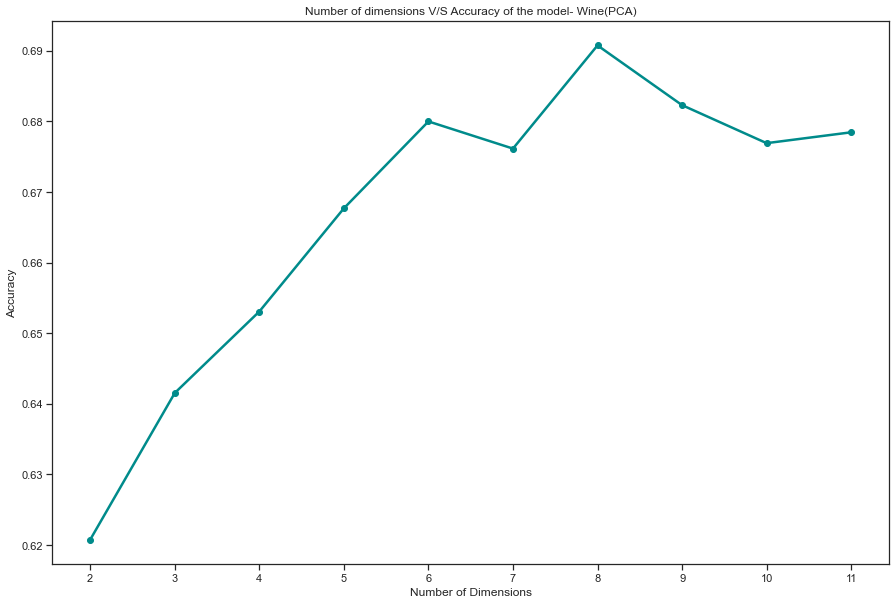

Best Accuracy for for the model is 0.6907692307692308 with dimensions = 8


In [340]:
n_dimensions = np.arange(2, 12)
test_accuracy_wine_pca = []


for i, j in enumerate(n_dimensions):
    
    pca = PCA(n_components = j)
    x_pca_wine = pca.fit_transform(pred_wine)
    X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(x_pca_wine, target_wine, test_size=0.2, random_state=27)
    
    knn_man_wine = KNeighborsClassifier(n_neighbors=64,weights="distance",p=1) #Unfitted model with distance metric as Manhattan(as p =1) for the classifier
    knn_man_wine.fit(X_train_wine, y_train_wine)
    man_predicted_data_wine = knn_man_wine.predict(X_test_wine)
    test_accuracy_wine_pca.append(accuracy_score(y_test_wine, man_predicted_data_wine))

plt.figure(figsize=[15, 10])                                        
plt.plot(n_dimensions, test_accuracy_wine_pca,'o-',linewidth=2.5,color = 'darkcyan')
plt.title("Number of dimensions V/S Accuracy of the model- Wine(PCA)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Accuracy")
plt.xticks(np.arange(2,12))
plt.show()

print("Best Accuracy for for the model is {} with dimensions = {}".format(np.max(test_accuracy_wine_pca), test_accuracy_wine_pca.index(np.max(test_accuracy_wine_pca)) + 2))


## 1 (d) Visualizing accuracy of the model based on LDA

### Abalone Dataset

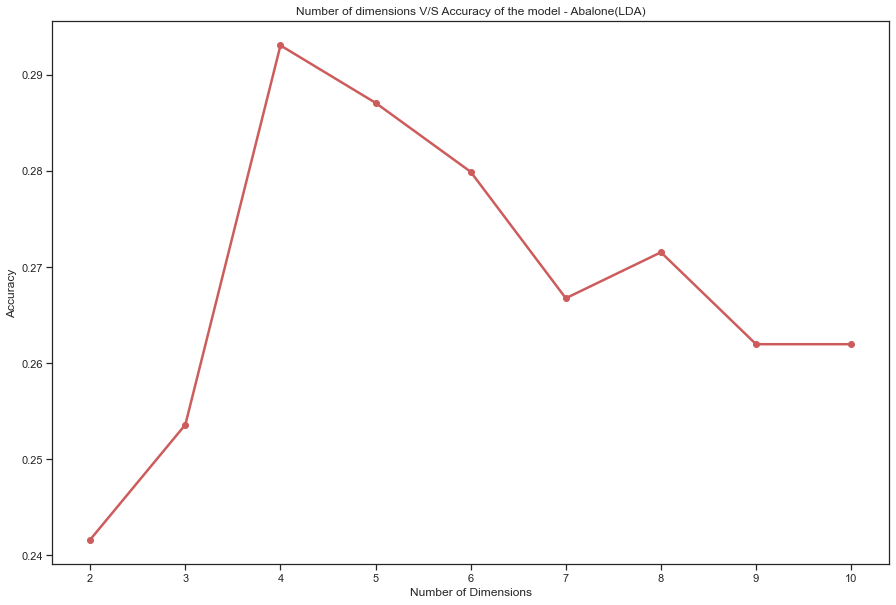

Best Accuracy for the model is 0.2930622009569378 with dimensions = 4


In [341]:
n_dimensions = np.arange(2,11)
test_accuracy_aba_lda = []

for i, j in enumerate(n_dimensions):
    
    lda = LinearDiscriminantAnalysis(n_components=j)
    x_lda_abalone = lda.fit(X, y).transform(X)
    X_train, X_test, y_train, y_test = train_test_split(x_lda_abalone, y, test_size=0.2, random_state = 27)
    
    knn_man_lda = KNeighborsClassifier(n_neighbors=59,weights="distance",p=1) #Unfitted model with distance metric as Manhattan(as p =1) for the classifier
    knn_man_lda.fit(X_train, y_train)
    man_predicted_data = knn_man_lda.predict(X_test)
    test_accuracy_aba_lda.append(accuracy_score(y_test, man_predicted_data))

plt.figure(figsize=[15, 10])                                        
plt.plot(n_dimensions, test_accuracy_aba_lda,'o-',linewidth=2.5,color = 'indianred')
plt.title("Number of dimensions V/S Accuracy of the model - Abalone(LDA)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Accuracy")
plt.xticks(np.arange(2,11))
plt.show()

print("Best Accuracy for the model is {} with dimensions = {}".format(np.max(test_accuracy_aba_lda), test_accuracy_aba_lda.index(np.max(test_accuracy_aba_lda)) + 2))


### Wine Dataset 

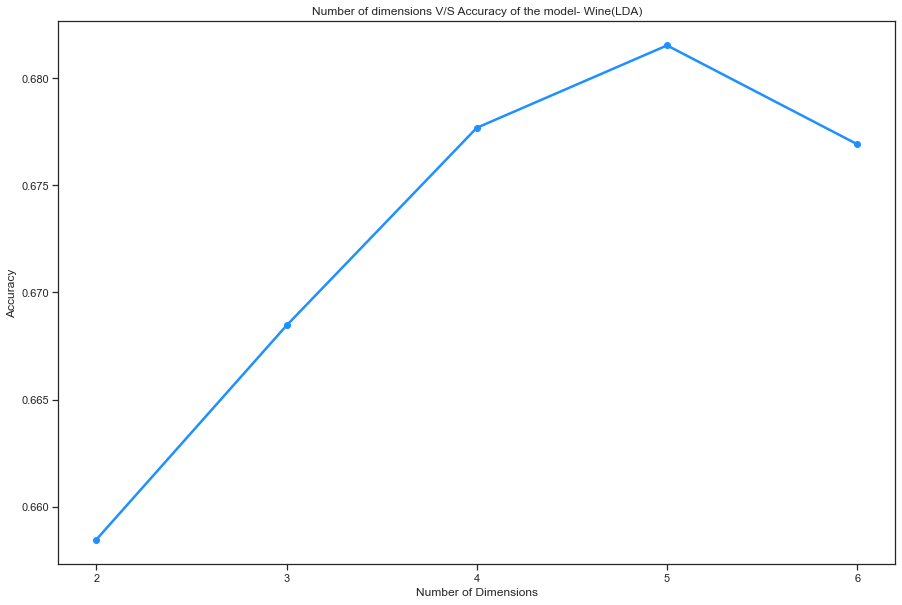

Best Accuracy for the model is 0.6815384615384615 with dimensions = 5


In [342]:
n_dimensions = np.arange(2, 7)
test_accuracy_wine_lda = []

for i, j in enumerate(n_dimensions):
    
    lda_wine = LinearDiscriminantAnalysis(n_components=j)
    x_lda_Lwine = lda_wine.fit(pred_wine, target_wine).transform(pred_wine)
    X_train_Lwine, X_test_Lwine, y_train_Lwine, y_test_Lwine = train_test_split(x_lda_Lwine, target_wine, test_size=0.2, random_state = 27)
    
    knn_man_lda_wine = KNeighborsClassifier(n_neighbors=64,weights="distance",p=1) #Unfitted model with distance metric as Manhattan(as p =1) for the classifier
    knn_man_lda_wine.fit(X_train_Lwine, y_train_Lwine)
    man_predicted_data_Lwine = knn_man_lda_wine.predict(X_test_Lwine)
    test_accuracy_wine_lda.append(accuracy_score(y_test_Lwine, man_predicted_data_Lwine))
    #dim_processed.append(j)
    #print(dim_processed)

plt.figure(figsize=[15, 10])                                        
plt.plot(n_dimensions, test_accuracy_wine_lda,'o-',linewidth=2.5,color = 'dodgerblue')
plt.title("Number of dimensions V/S Accuracy of the model- Wine(LDA)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Accuracy")
plt.xticks(np.arange(2, 7))
plt.show()

print("Best Accuracy for the model is {} with dimensions = {}".format(np.max(test_accuracy_wine_lda), test_accuracy_wine_lda.index(np.max(test_accuracy_wine_lda)) + 2))


## 2. Naive Bayes Classification

In [343]:
#The following are the datasets on which further classification would be performed

#Raw(Original) Datasets
# 1. abalone_minmax
# 2. wine_znormalized

#PCA reduced datasets
# 1. abalone_pca
# 2. wine_pca

#LDA reduced datsets
# 1. abalone_lda
# 2. wine_lda

### Splitting the abalone dataset for all the model classification

In [344]:
# For raw abalone 
X_train_abr, X_test_abr, y_train_abr, y_test_abr = train_test_split(X, y, test_size=0.2, random_state = 27)

# For abalone PCA - scaling and splitting
scaler = MinMaxScaler()
scaler.fit(abalone_pca)
abalone_scaled_pca = scaler.transform(abalone_pca)
X_train_abp, X_test_abp, y_train_abp, y_test_abp = train_test_split(abalone_scaled_pca, y, test_size=0.2, random_state = 27)

# For abalone LDA - scaling and splitting
scaler = MinMaxScaler()
scaler.fit(abalone_lda)
abalone_scaled_lda = scaler.transform(abalone_lda)
X_train_abL, X_test_abL, y_train_abL, y_test_abL = train_test_split(abalone_scaled_lda, y, test_size=0.2, random_state = 27)



In [345]:
def getAccuracyScore(model_name,X_train,y_train,X_test,y_test):
    model_name.fit(X_train,y_train)
    pred_data = model_name.predict(X_test)
    accuracy_score_pred = accuracy_score(y_test,pred_data)
    return accuracy_score_pred

### Abalone Raw dataset

In [346]:
nb_abr_accuracy_score = getAccuracyScore(MultinomialNB(),X_train_abr,y_train_abr,X_test_abr,y_test_abr)
cv_score_abr_mnb = np.mean(cross_val_score(MultinomialNB(),X_train_abr,y_train_abr,cv=5))
print('5-fold cross validation score - Multinomail NB is ',cv_score_abr_mnb)
print('Train/Test Accuracy score - Multinomail NB is ',nb_abr_accuracy_score)

compli_abr_accuracy_score = getAccuracyScore(ComplementNB(),X_train_abr,y_train_abr,X_test_abr,y_test_abr)
cv_score_abr_cnb = np.mean(cross_val_score(ComplementNB(),X_train_abr,y_train_abr,cv=5))
print('5-fold cross validation score - Complement NB is ',cv_score_abr_cnb)
print('Train/Test Accuracy score - Compliment NB is ',compli_abr_accuracy_score)

knn_abr_accuracy_score = getAccuracyScore(KNeighborsClassifier(n_neighbors=59,weights="distance",p=1),
                                          X_train_abr,y_train_abr,X_test_abr,y_test_abr)
cv_score_abr_knn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=59,weights="distance",p=1),X_train_abr,y_train_abr,cv=5))
print('5-fold cross validation score - KNN is ',cv_score_abr_knn)
print('Train/Test Accuracy score - KNN is ',knn_abr_accuracy_score)


5-fold cross validation score - Multinomail NB is  0.20891490561477938
Train/Test Accuracy score - Multinomail NB is  0.20095693779904306
5-fold cross validation score - Complement NB is  0.1921600744698943
Train/Test Accuracy score - Compliment NB is  0.18181818181818182
5-fold cross validation score - KNN is  0.2592026708914011
Train/Test Accuracy score - KNN is  0.27751196172248804


### Abalone PCA dataset

In [241]:
nb_abp_accuracy_score = getAccuracyScore(MultinomialNB(),X_train_abp,y_train_abp,X_test_abp,y_test_abp)
cv_score_abp_mnb = np.mean(cross_val_score(MultinomialNB(),X_train_abp,y_train_abp,cv=5))
print('5-fold cross validation score - Multinomail NB is ',cv_score_abp_mnb)
print('Train/Test Accuracy score - Multinomail NB is ',nb_abp_accuracy_score)

compli_abp_accuracy_score = getAccuracyScore(ComplementNB(),X_train_abp,y_train_abp,X_test_abp,y_test_abp)
cv_score_abp_cnb = np.mean(cross_val_score(ComplementNB(),X_train_abp,y_train_abp,cv=5))
print('5-fold cross validation score - Complement NB is ',cv_score_abp_cnb)
print('Train/Test Accuracy score - Compliment NB is ',compli_abp_accuracy_score)

knn_abp_accuracy_score = getAccuracyScore(KNeighborsClassifier(n_neighbors=59,weights="distance",p=1),
                                          X_train_abp,y_train_abp,X_test_abp,y_test_abp)
cv_score_abp_knn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=59,weights="distance",p=1),X_train_abp,y_train_abp,cv=5))
print('5-fold cross validation score - KNN is ',cv_score_abp_knn)
print('Train/Test Accuracy score - KNN is ',knn_abp_accuracy_score)


5-fold cross validation score - Multinomail NB is  0.1661179882387691
Train/Test Accuracy score - Multinomail NB is  0.1590909090909091
5-fold cross validation score - Complement NB is  0.13529085327103638
Train/Test Accuracy score - Compliment NB is  0.1423444976076555
5-fold cross validation score - KNN is  0.2143054697779329
Train/Test Accuracy score - KNN is  0.2332535885167464


### Abalone LDA dataset

In [242]:
nb_abl_accuracy_score = getAccuracyScore(MultinomialNB(),X_train_abL,y_train_abL,X_test_abL,y_test_abL)
cv_score_abl_mnb = np.mean(cross_val_score(MultinomialNB(),X_train_abL,y_train_abL,cv=5))
print('5-fold cross validation score - Multinomail NB is ',cv_score_abl_mnb)
print('Train/Test Accuracy score - Multinomail NB is ',nb_abl_accuracy_score)

compli_abl_accuracy_score = getAccuracyScore(ComplementNB(),X_train_abL,y_train_abL,X_test_abL,y_test_abL)
cv_score_abl_cnb = np.mean(cross_val_score(ComplementNB(),X_train_abL,y_train_abL,cv=5))
print('5-fold cross validation score - Complement NB is ',cv_score_abl_cnb)
print('Train/Test Accuracy score - Compliment NB is ',compli_abl_accuracy_score)

knn_abl_accuracy_score = getAccuracyScore(KNeighborsClassifier(n_neighbors=59,weights="distance",p=1),
                                          X_train_abL,y_train_abL,X_test_abL,y_test_abL)
cv_score_abl_knn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=59,weights="distance",p=1),X_train_abL,y_train_abL,cv=5))
print('5-fold cross validation score - KNN is ',cv_score_abl_knn)
print('Train/Test Accuracy score - KNN is ',knn_abl_accuracy_score)


5-fold cross validation score - Multinomail NB is  0.16671679063397868
Train/Test Accuracy score - Multinomail NB is  0.15789473684210525
5-fold cross validation score - Complement NB is  0.17599419994092533
Train/Test Accuracy score - Compliment NB is  0.16507177033492823
5-fold cross validation score - KNN is  0.2358587757220984
Train/Test Accuracy score - KNN is  0.24043062200956938


### Splitting the Wine dataset into test and train for all the models

In [243]:
# For raw Wine 
scaler = MinMaxScaler()
scaler.fit(pred_wine)
wine_scaled_nb = scaler.transform(pred_wine)
X_train_wineR, X_test_wineR, y_train_wineR, y_test_wineR = train_test_split(wine_scaled_nb, target_wine, test_size=0.2, random_state = 27)

# For Wine PCA - scaling and splitting
scaler = MinMaxScaler()
scaler.fit(wine_pca)
wine_scaled_pca = scaler.transform(wine_pca)
X_train_wineP, X_test_wineP, y_train_wineP, y_test_wineP = train_test_split(wine_scaled_pca,target_wine, test_size=0.2, random_state = 27)

# For Wine LDA - scaling and splitting
scaler = MinMaxScaler()
scaler.fit(wine_lda)
wine_scaled_lda = scaler.transform(wine_lda)
X_train_wineL, X_test_wineL, y_train_wineL, y_test_wineL = train_test_split(wine_scaled_lda, target_wine, test_size=0.2, random_state = 27)


### Naive Bayes on Wine Raw Dataset

In [244]:
nb_wineR_accuracy_score = getAccuracyScore(MultinomialNB(),X_train_wineR,y_train_wineR,X_test_wineR,y_test_wineR)
cv_score_wineR_mnb = np.mean(cross_val_score(MultinomialNB(),X_train_wineR,y_train_wineR,cv=5))
print('5-fold cross validation score - Multinomail NB is ',cv_score_wineR_mnb)
print('Train/Test Accuracy score - Multinomail NB is ',nb_wineR_accuracy_score)

compli_wineR_accuracy_score = getAccuracyScore(ComplementNB(),X_train_wineR,y_train_wineR,X_test_wineR,y_test_wineR)
cv_score_wineR_cnb = np.mean(cross_val_score(ComplementNB(),X_train_wineR,y_train_wineR,cv=5))
print('5-fold cross validation score - Complement NB is ',cv_score_wineR_cnb)
print('Train/Test Accuracy score - Compliment NB is ',compli_wineR_accuracy_score)

knn_wineR_accuracy_score = getAccuracyScore(KNeighborsClassifier(n_neighbors=64,weights="distance",p=1),
                                            X_train_wineR,y_train_wineR,X_test_wineR,y_test_wineR)
cv_score_wineR_knn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=64,weights="distance",p=1),X_train_wineR,y_train_wineR,cv=5))
print('5-fold cross validation score - KNN is ',cv_score_wineR_knn)
print('Train/Test Accuracy score - KNN is ',knn_wineR_accuracy_score)


5-fold cross validation score - Multinomail NB is  0.47392722292144807
Train/Test Accuracy score - Multinomail NB is  0.47
5-fold cross validation score - Complement NB is  0.39560542681572514
Train/Test Accuracy score - Compliment NB is  0.4107692307692308
5-fold cross validation score - KNN is  0.6551800918042496
Train/Test Accuracy score - KNN is  0.6846153846153846


### Naive Bayes on Wine PCA Dataset

In [245]:
nb_wineP_accuracy_score = getAccuracyScore(MultinomialNB(),X_train_wineP,y_train_wineP,X_test_wineP,y_test_wineP)
cv_score_wineP_mnb = np.mean(cross_val_score(MultinomialNB(),X_train_wineP,y_train_wineP,cv=5))
print('5-fold cross validation score - Multinomail NB is ',cv_score_wineP_mnb)
print('Train/Test Accuracy score - Multinomail NB is ',nb_wineP_accuracy_score)

compli_wineP_accuracy_score = getAccuracyScore(ComplementNB(),X_train_wineP,y_train_wineP,X_test_wineP,y_test_wineP)
cv_score_wineP_cnb = np.mean(cross_val_score(ComplementNB(),X_train_wineP,y_train_wineP,cv=5))
print('5-fold cross validation score - Complement NB is ',cv_score_wineP_cnb)
print('Train/Test Accuracy score - Compliment NB is ',compli_wineP_accuracy_score)

knn_wineP_accuracy_score = getAccuracyScore(KNeighborsClassifier(n_neighbors=64,weights="distance",p=1),
                                            X_train_wineP,y_train_wineP,X_test_wineP,y_test_wineP)
cv_score_wineP_knn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=64,weights="distance",p=1),X_train_wineP,y_train_wineP,cv=5))
print('5-fold cross validation score - KNN is ',cv_score_wineP_knn)
print('Train/Test Accuracy score - KNN is ',knn_wineP_accuracy_score)


5-fold cross validation score - Multinomail NB is  0.43602076700969866
Train/Test Accuracy score - Multinomail NB is  0.43846153846153846
5-fold cross validation score - Complement NB is  0.2995979862293625
Train/Test Accuracy score - Compliment NB is  0.2907692307692308
5-fold cross validation score - KNN is  0.5778337158510402
Train/Test Accuracy score - KNN is  0.6246153846153846


### Naive Bayes on Wine LDA Dataset

In [347]:
nb_wineL_accuracy_score = getAccuracyScore(MultinomialNB(),X_train_wineL,y_train_wineL,X_test_wineL,y_test_wineL)
cv_score_wineL_mnb = np.mean(cross_val_score(MultinomialNB(),X_train_wineL,y_train_wineL,cv=5))
print('5-fold cross validation score - Multinomail NB is ',cv_score_wineL_mnb)
print('Train/Test Accuracy score - Multinomail NB is ',nb_wineP_accuracy_score)

compli_wineL_accuracy_score = getAccuracyScore(ComplementNB(),X_train_wineL,y_train_wineL,X_test_wineL,y_test_wineL)
cv_score_wineL_cnb = np.mean(cross_val_score(ComplementNB(),X_train_wineL,y_train_wineL,cv=5))
print('5-fold cross validation score - Complement NB is ',cv_score_wineL_cnb)
print('Train/Test Accuracy score - Compliment NB is ',compli_wineP_accuracy_score)

knn_wineL_accuracy_score = getAccuracyScore(KNeighborsClassifier(n_neighbors=64,weights="distance",p=1),
                                            X_train_wineL,y_train_wineL,X_test_wineL,y_test_wineL)
cv_score_wineL_knn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=64,weights="distance",p=1),X_train_wineL,y_train_wineL,cv=5))
print('5-fold cross validation score - KNN is ',cv_score_wineL_knn)
print('Train/Test Accuracy score - KNN is ',knn_wineL_accuracy_score)


5-fold cross validation score - Multinomail NB is  0.43602076700969866
Train/Test Accuracy score - Multinomail NB is  0.43846153846153846
5-fold cross validation score - Complement NB is  0.38175797734508027
Train/Test Accuracy score - Compliment NB is  0.2907692307692308
5-fold cross validation score - KNN is  0.6295911379284816
Train/Test Accuracy score - KNN is  0.6461538461538462


### Comparison of Naive Bayes Accuracies

In [348]:
table_accuracies_NB = [['Dataset', 'Classifier','Accuracy'], ['Abalone - Raw', 'Multinomial NB',cv_score_abr_mnb], 
         ['Abalone - Raw', 'Complement NB',cv_score_abr_cnb], ['Abalone - Raw', 'KNN',cv_score_abr_knn],
         ['Abalone - PCA', 'Multinomial NB',cv_score_abp_mnb],['Abalone - PCA', 'Complement NB', cv_score_abp_cnb], 
         ['Abalone - PCA', 'KNN', cv_score_abp_knn],['Abalone - LDA', 'Multinomial NB',cv_score_abl_mnb], 
         ['Abalone - LDA', 'Complement NB',cv_score_abl_cnb],['Abalone - LDA', 'KNN',cv_score_abl_knn],
         ['Wine - Raw', 'Multinomial NB', cv_score_wineR_mnb], ['Wine - Raw', 'Complement NB',cv_score_wineR_cnb], 
         ['Wine - Raw', 'KNN',cv_score_wineR_knn], ['Wine - PCA', 'Multinomail NB',cv_score_wineP_mnb], 
         ['Wine - PCA', 'Complement NB',cv_score_wineP_cnb], ['Wine - PCA', 'KNN',cv_score_wineP_knn],
         ['Wine - LDA', 'Multinomial NB',cv_score_wineL_mnb], ['Wine - LDA', 'Complement NB',cv_score_wineL_cnb],
         ['Wine - LDA', 'KNN',cv_score_wineL_knn]]


In [350]:
print(tabulate(table_accuracies_NB, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════╤════════════════╤════════════╕
│ Dataset       │ Classifier     │   Accuracy │
╞═══════════════╪════════════════╪════════════╡
│ Abalone - Raw │ Multinomial NB │   0.208915 │
├───────────────┼────────────────┼────────────┤
│ Abalone - Raw │ Complement NB  │   0.19216  │
├───────────────┼────────────────┼────────────┤
│ Abalone - Raw │ KNN            │   0.259203 │
├───────────────┼────────────────┼────────────┤
│ Abalone - PCA │ Multinomial NB │   0.166118 │
├───────────────┼────────────────┼────────────┤
│ Abalone - PCA │ Complement NB  │   0.135291 │
├───────────────┼────────────────┼────────────┤
│ Abalone - PCA │ KNN            │   0.214305 │
├───────────────┼────────────────┼────────────┤
│ Abalone - LDA │ Multinomial NB │   0.166717 │
├───────────────┼────────────────┼────────────┤
│ Abalone - LDA │ Complement NB  │   0.175994 │
├───────────────┼────────────────┼────────────┤
│ Abalone - LDA │ KNN            │   0.235859 │
├───────────────┼────────────────┼──────

## 3. Decision Trees Classifier

In [351]:
def modelComparisonGridSearch(model_name,params_list,X_train,y_train,no_of_folds):
    grid_search_model = GridSearchCV(model_name,params_list,cv=no_of_folds)
    grid_search_result = grid_search_model.fit(X_train,y_train)
    model_best_score = grid_search_result.best_score_
    model_best_params = grid_search_result.best_params_
    return grid_search_result,model_best_score,model_best_params

### Abalone Raw Dataset

In [352]:
gsc_abr_dt,gsc_abr_score_dt,gsc_abr_params_dt = modelComparisonGridSearch(DecisionTreeClassifier(),
                                                    {'max_depth' : np.arange(1,11)},X_train_abr,y_train_abr,5)

dt_data = pd.DataFrame(gsc_abr_dt.cv_results_)
dt_data

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002118      0.000539         0.000437        0.000370   
1       0.002749      0.000104         0.000299        0.000060   
2       0.003877      0.000514         0.000325        0.000060   
3       0.004610      0.000076         0.000226        0.000013   
4       0.005186      0.000048         0.000206        0.000005   
5       0.006168      0.000038         0.000213        0.000002   
6       0.007170      0.000035         0.000219        0.000003   
7       0.008281      0.000099         0.000293        0.000106   
8       0.009611      0.000153         0.000383        0.000072   
9       0.010238      0.000108         0.000284        0.000046   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               1   {'max_depth': 1}           0.206278           0.211078   
1               2   {'max_depth': 2}           0.239163           0.232036   
2               3   {'max_depth': 3}           0.270553           0.248503   
3               4   {'max_depth': 4}           0.289985           0.263473   
4               5   {'max_depth': 5}           0.294469           0.248503   
5               6   {'max_depth': 6}           0.263079           0.260479   
6               7   {'max_depth': 7}           0.258595           0.245509   
7               8   {'max_depth': 8}           0.233184           0.236527   
8               9   {'max_depth': 9}           0.230194           0.217066   
9              10  {'max_depth': 10}           0.209268           0.238024   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.203593           0.211078           0.202096         0.206824   
1           0.233533           0.247006           0.254491         0.241246   
2           0.235030           0.257485           0.264970         0.255308   
3           0.264970           0.267964           0.254491         0.268177   
4           0.267964           0.261976           0.257485         0.266080   
5           0.272455           0.254491           0.250000         0.260101   
6           0.261976           0.252994           0.242515         0.252318   
7           0.266467           0.241018           0.229042         0.241248   
8           0.260479           0.242515           0.232036         0.236458   
9           0.251497           0.242515           0.212575         0.230776   

   std_test_score  rank_test_score  
0        0.003722               10  
1        0.008453                7  
2        0.012554                4  
3        0.011793                1  
4        0.015551                2  
5        0.007683                3  
6        0.007424                5  
7        0.013209                6  
8        0.014481                8  
9        0.016814                9

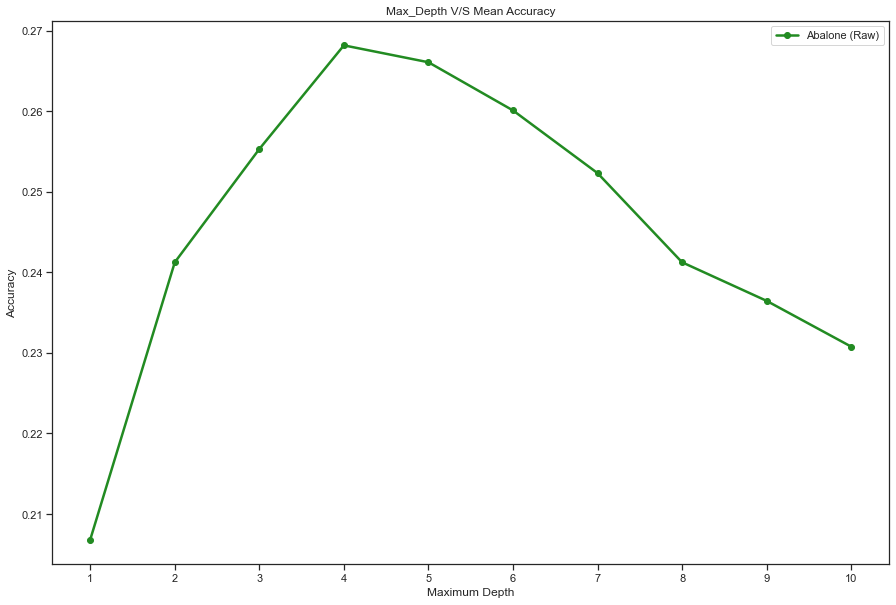

Maximum Accuracy of the model with Abalone(Raw) dataset is  0.26817665118194106  with parameters  {'max_depth': 4}


In [353]:
plt.figure(figsize=[15, 10])

plt.plot(dt_data.param_max_depth, dt_data.mean_test_score,'o-',linewidth=2.5,color = 'forestgreen',label = 'Abalone (Raw)')

plt.title("Max_Depth V/S Mean Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,11))
plt.legend()
plt.show()

print('Maximum Accuracy of the model with Abalone(Raw) dataset is ',gsc_abr_score_dt,' with parameters ',gsc_abr_params_dt)


In [354]:
#Using the best parameters from above to calculate the accuracy of the testing set

test_abr_accuracy_score_dt = getAccuracyScore(DecisionTreeClassifier(max_depth = 4,random_state = 27),
                                              X_train_abr,y_train_abr,X_test_abr,y_test_abr)
print('Testing Accuracy Score using Best Parameters is -> ',test_abr_accuracy_score_dt)

Testing Accuracy Score using Best Parameters is ->  0.2535885167464115


### Abalone PCA Dataset

In [355]:
gsc_abp_dt,gsc_abp_score_dt,gsc_abp_params_dt = modelComparisonGridSearch(DecisionTreeClassifier(),
                                                        {'max_depth' : np.arange(1,11)},X_train_abp,y_train_abp,5)

dt_data_abp = pd.DataFrame(gsc_abp_dt.cv_results_)
dt_data_abp


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001677      0.000545         0.000354        0.000180   
1       0.002360      0.000540         0.000361        0.000056   
2       0.002204      0.000084         0.000268        0.000051   
3       0.002551      0.000080         0.000291        0.000071   
4       0.003187      0.000104         0.000254        0.000035   
5       0.003138      0.000036         0.000204        0.000007   
6       0.003506      0.000095         0.000206        0.000001   
7       0.003919      0.000040         0.000206        0.000003   
8       0.004291      0.000076         0.000218        0.000011   
9       0.004674      0.000076         0.000218        0.000002   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               1   {'max_depth': 1}           0.212257           0.205090   
1               2   {'max_depth': 2}           0.242152           0.223054   
2               3   {'max_depth': 3}           0.266069           0.238024   
3               4   {'max_depth': 4}           0.254111           0.236527   
4               5   {'max_depth': 5}           0.254111           0.233533   
5               6   {'max_depth': 6}           0.258595           0.229042   
6               7   {'max_depth': 7}           0.257100           0.223054   
7               8   {'max_depth': 8}           0.251121           0.205090   
8               9   {'max_depth': 9}           0.249626           0.200599   
9              10  {'max_depth': 10}           0.236173           0.197605   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.200599           0.200599           0.212575         0.206224   
1           0.227545           0.226048           0.209581         0.225676   
2           0.245509           0.248503           0.250000         0.249621   
3           0.245509           0.264970           0.254491         0.251122   
4           0.242515           0.227545           0.244012         0.240343   
5           0.244012           0.224551           0.238024         0.238845   
6           0.245509           0.215569           0.248503         0.237947   
7           0.244012           0.252994           0.241018         0.238847   
8           0.230539           0.244012           0.229042         0.230764   
9           0.230539           0.229042           0.223054         0.223283   

   std_test_score  rank_test_score  
0        0.005316               10  
1        0.010402                8  
2        0.009201                2  
3        0.009556                1  
4        0.009142                3  
5        0.011982                5  
6        0.015862                6  
7        0.017446                4  
8        0.016996                7  
9        0.013501                9

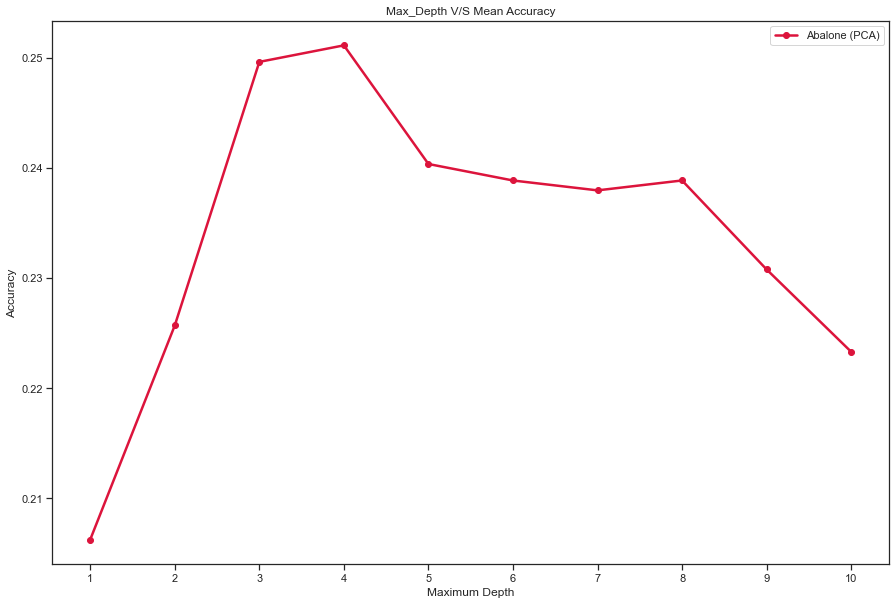

Maximum Accuracy of the model with Abalone(PCA) dataset is  0.2511215237686063  with parameters  {'max_depth': 4}


In [356]:
plt.figure(figsize=[15, 10])

plt.plot(dt_data_abp.param_max_depth, dt_data_abp.mean_test_score,'o-',linewidth=2.5,color = 'crimson',label = 'Abalone (PCA)')

plt.title("Max_Depth V/S Mean Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,11))
plt.legend()
plt.show()

print('Maximum Accuracy of the model with Abalone(PCA) dataset is ',gsc_abp_score_dt,' with parameters ',gsc_abp_params_dt)


In [357]:
#Using the best parameters from above to calculate the accuracy of the testing set

test_abp_accuracy_score_dt = getAccuracyScore(DecisionTreeClassifier(max_depth = 4,random_state = 27),
                                              X_train_abp,y_train_abp,X_test_abp,y_test_abp)
print('Testing Accuracy Score using Best Parameters is -> ',test_abp_accuracy_score_dt)


Testing Accuracy Score using Best Parameters is ->  0.2619617224880383


### Abalone LDA dataset

In [358]:
gsc_abl_dt,gsc_abl_score_dt,gsc_abl_params_dt = modelComparisonGridSearch(DecisionTreeClassifier(),
                                                        {'max_depth' : np.arange(1,11)},X_train_abL,y_train_abL,5)

dt_data_abl = pd.DataFrame(gsc_abl_dt.cv_results_)
dt_data_abl

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001710      0.000618         0.000327        0.000168   
1       0.001808      0.000023         0.000246        0.000021   
2       0.002252      0.000087         0.000242        0.000026   
3       0.002718      0.000101         0.000276        0.000086   
4       0.003284      0.000067         0.000278        0.000071   
5       0.003614      0.000137         0.000265        0.000047   
6       0.003901      0.000032         0.000237        0.000016   
7       0.004347      0.000092         0.000243        0.000022   
8       0.004763      0.000058         0.000264        0.000046   
9       0.005111      0.000036         0.000236        0.000007   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               1   {'max_depth': 1}           0.210762           0.211078   
1               2   {'max_depth': 2}           0.240658           0.263473   
2               3   {'max_depth': 3}           0.249626           0.276946   
3               4   {'max_depth': 4}           0.255605           0.261976   
4               5   {'max_depth': 5}           0.240658           0.264970   
5               6   {'max_depth': 6}           0.246637           0.251497   
6               7   {'max_depth': 7}           0.243647           0.212575   
7               8   {'max_depth': 8}           0.231689           0.227545   
8               9   {'max_depth': 9}           0.230194           0.238024   
9              10  {'max_depth': 10}           0.243647           0.247006   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.212575           0.205090           0.220060         0.211913   
1           0.266467           0.252994           0.252994         0.255317   
2           0.257485           0.267964           0.248503         0.260105   
3           0.238024           0.229042           0.252994         0.247528   
4           0.244012           0.220060           0.255988         0.245138   
5           0.239521           0.220060           0.250000         0.241543   
6           0.252994           0.217066           0.255988         0.236454   
7           0.250000           0.239521           0.215569         0.232865   
8           0.251497           0.248503           0.214072         0.236458   
9           0.221557           0.233533           0.194611         0.228071   

   std_test_score  rank_test_score  
0        0.004804               10  
1        0.009127                2  
2        0.010924                1  
3        0.012132                3  
4        0.015240                4  
5        0.011508                5  
6        0.018182                7  
7        0.011548                8  
8        0.013521                6  
9        0.018937                9

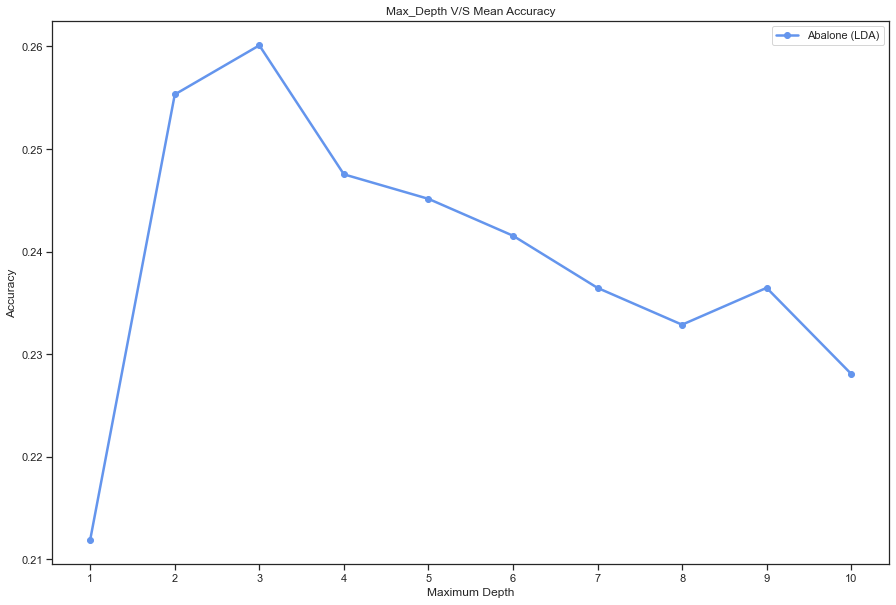

Maximum Accuracy of the model with Abalone(LDA) dataset is  0.2601049023030173  with parameters  {'max_depth': 3}


In [359]:
plt.figure(figsize=[15, 10])

plt.plot(dt_data_abl.param_max_depth, dt_data_abl.mean_test_score,'o-',linewidth=2.5,color = 'cornflowerblue',label = 'Abalone (LDA)')
plt.title("Max_Depth V/S Mean Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,11))
plt.legend()
plt.show()

print('Maximum Accuracy of the model with Abalone(LDA) dataset is ',gsc_abl_score_dt,' with parameters ',gsc_abl_params_dt)


In [360]:
#Using the best parameters from above to calculate the accuracy of the testing set
test_abl_accuracy_score_dt = getAccuracyScore(DecisionTreeClassifier(max_depth = 3,random_state = 27),
                                              X_train_abL,y_train_abL,X_test_abL,y_test_abL)
print('Testing Accuracy Score using Best Parameters is -> ',test_abl_accuracy_score_dt)


Testing Accuracy Score using Best Parameters is ->  0.24282296650717702


### Visualization of Abalone Dataset for a range of parameter values

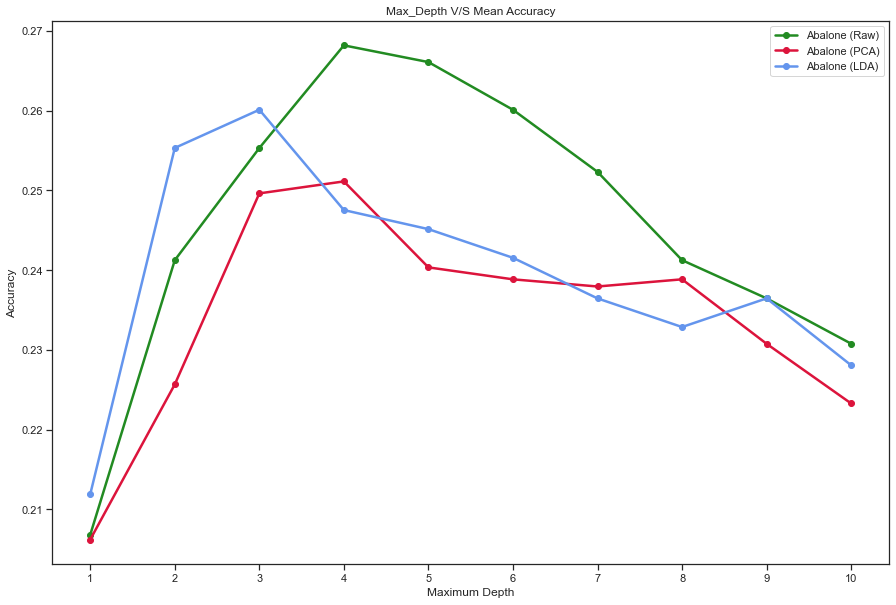

Maximum Accuracy of the model with Abalone(Raw) dataset is  0.26817665118194106  with parameters  {'max_depth': 4}
Maximum Accuracy of the model with Abalone(PCA) dataset is  0.2511215237686063  with parameters  {'max_depth': 4}
Maximum Accuracy of the model with Abalone(LDA) dataset is  0.2601049023030173  with parameters  {'max_depth': 3}


In [361]:
plt.figure(figsize=[15, 10])

plt.plot(dt_data.param_max_depth, dt_data.mean_test_score,'o-',linewidth=2.5,color = 'forestgreen',label = 'Abalone (Raw)')
plt.plot(dt_data_abp.param_max_depth, dt_data_abp.mean_test_score,'o-',linewidth=2.5,color = 'crimson',label = 'Abalone (PCA)')
plt.plot(dt_data_abl.param_max_depth, dt_data_abl.mean_test_score,'o-',linewidth=2.5,color = 'cornflowerblue',label = 'Abalone (LDA)')

plt.title("Max_Depth V/S Mean Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,11))
plt.legend()
plt.show()

print('Maximum Accuracy of the model with Abalone(Raw) dataset is ',gsc_abr_dt.best_score_,' with parameters ',gsc_abr_dt.best_params_)
print('Maximum Accuracy of the model with Abalone(PCA) dataset is ',gsc_abp_dt.best_score_,' with parameters ',gsc_abp_dt.best_params_)
print('Maximum Accuracy of the model with Abalone(LDA) dataset is ',gsc_abl_dt.best_score_,' with parameters ',gsc_abl_dt.best_params_)


In [370]:
abalone_columns = ['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']
target_column_aba = 'Rings'
category_variable_aba = 'Sex'
total_cols_aba = abalone_columns + [target_column_aba,category_variable_aba]

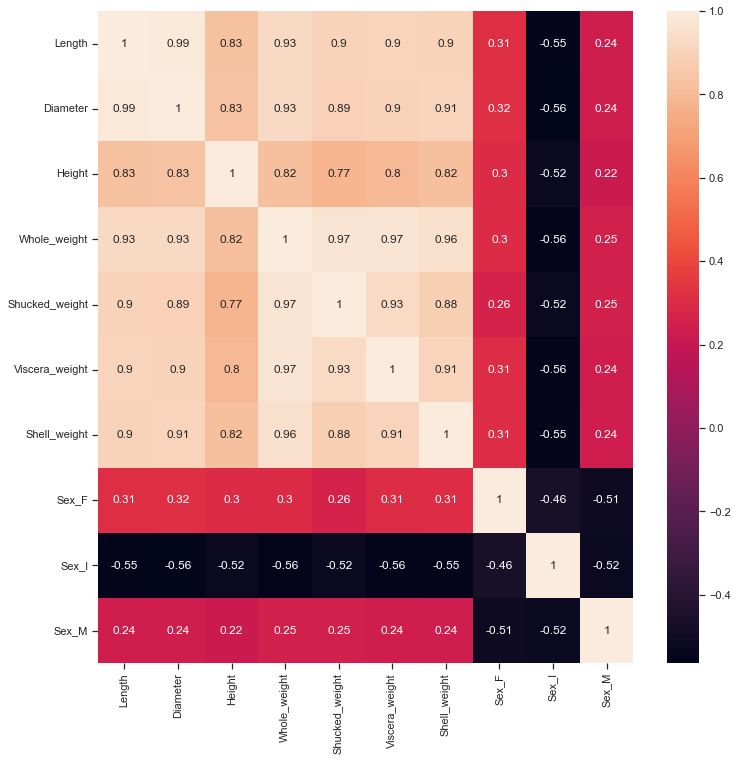

In [432]:
plt.figure(figsize=(12, 12))
corr_matrix = abalone_df_encoded.corr()
_ = sns.heatmap(corr_matrix, annot=True)

In [518]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [524]:
clf = DecisionTreeClassifier(max_depth = 2, random_state=27)
clf = clf.fit(X_train_abr,y_train_abr)


In [520]:
abalone_data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [526]:
plt.figure(figsize=(180, 150))
tree.plot_tree(clf,fontsize=130,filled=True,precision=3,feature_names=abalone_df_encoded.columns)
plt.title("Decision Trees - Abalone Raw with max_depth:2",fontsize=180)
plt.show()

The above decison tree explains the splitting rules and conditions followed at each step to select the best feature to consider based on the Gini Impurity Value.

1. Shell_weight with decision boundary value of 0.143 is considered as the root node since it has the maximum correlation with the target variable Rings that was visualized with the correlation matrix in Assignment 1.
2. There are 3341 samples in total and the value arrray = [1,1,10] describes the repartition of the abalones among the unique possible classes of Rings.
3. The class of Rings corresponding to the maximum value in the array is selected as the class for that particular node.
4. Before splitting every node the Gini Impurity for various values of decision boundary is calculated and the boundary with the least Gini Impurity is selected and the tree is split based on the condition True or False.
5. If the classification of the variable being tested is correct the flow then moves to the left of the tree and the next best split is calculated for each node until the leaf node is attained i.e with depth of tree as 2 in the above case.


## Decision Tree Classifier - Wine

### Wine Raw Dataset

In [363]:
gsc_wineR_dt,gsc_wineR_score_dt,gsc_wineR_params_dt = modelComparisonGridSearch(DecisionTreeClassifier(),
                                                    {'max_depth' : np.arange(10,30)},X_train_wineR,y_train_wineR,5)

dt_data_wineR = pd.DataFrame(gsc_wineR_dt.cv_results_)
dt_data_wineR

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.019948      0.003105         0.000429        0.000099   
1        0.018426      0.000114         0.000266        0.000004   
2        0.019722      0.000102         0.000272        0.000004   
3        0.020827      0.000117         0.000274        0.000004   
4        0.021666      0.000126         0.000303        0.000055   
5        0.022475      0.000147         0.000354        0.000060   
6        0.022784      0.000142         0.000301        0.000010   
7        0.023154      0.000086         0.000318        0.000057   
8        0.023289      0.000137         0.000282        0.000002   
9        0.024186      0.000374         0.000469        0.000099   
10       0.024310      0.000374         0.000514        0.000070   
11       0.024028      0.000542         0.000400        0.000080   
12       0.023998      0.000206         0.000424        0.000050   
13       0.024647      0.000426         0.000478        0.000058   
14       0.024476      0.000250         0.000449        0.000062   
15       0.024514      0.000302         0.000488        0.000074   
16       0.024429      0.000229         0.000552        0.000066   
17       0.024001      0.000583         0.000355        0.000077   
18       0.023635      0.000241         0.000284        0.000003   
19       0.023867      0.000137         0.000365        0.000078   

   param_max_depth             params  split0_test_score  split1_test_score  \
0               10  {'max_depth': 10}           0.543269           0.569231   
1               11  {'max_depth': 11}           0.562500           0.581731   
2               12  {'max_depth': 12}           0.570192           0.575000   
3               13  {'max_depth': 13}           0.553846           0.569231   
4               14  {'max_depth': 14}           0.567308           0.559615   
5               15  {'max_depth': 15}           0.557692           0.582692   
6               16  {'max_depth': 16}           0.564423           0.582692   
7               17  {'max_depth': 17}           0.555769           0.575000   
8               18  {'max_depth': 18}           0.570192           0.585577   
9               19  {'max_depth': 19}           0.574038           0.591346   
10              20  {'max_depth': 20}           0.576923           0.590385   
11              21  {'max_depth': 21}           0.578846           0.579808   
12              22  {'max_depth': 22}           0.571154           0.583654   
13              23  {'max_depth': 23}           0.580769           0.588462   
14              24  {'max_depth': 24}           0.586538           0.585577   
15              25  {'max_depth': 25}           0.585577           0.585577   
16              26  {'max_depth': 26}           0.587500           0.593269   
17              27  {'max_depth': 27}           0.590385           0.602885   
18              28  {'max_depth': 28}           0.588462           0.589423   
19              29  {'max_depth': 29}           0.582692           0.584615   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.558229           0.558229           0.522618         0.550315   
1            0.563041           0.564004           0.542830         0.562821   
2            0.559192           0.569779           0.528393         0.560511   
3            0.566891           0.579403           0.535130         0.560900   
4            0.556304           0.578441           0.540905         0.560515   
5            0.565929           0.575553           0.534167         0.563207   
6            0.570741           0.578441           0.544755         0.568210   
7            0.563041           0.586141           0.545717         0.565134   
8            0.582291           0.589028           0.547642         0.574946   
9            0.554379           0.573628           0.537055         0.566089   
10           0.574591           0.5

In [ ]:
plt.figure(figsize=[15, 10])

plt.plot(dt_data_wineR.param_max_depth, dt_data_wineR.mean_test_score,'o-',linewidth=2.5,color = 'mediumseagreen',label = 'Wine(Raw)')
plt.title("Max_Depth V/S Mean Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10,31))
plt.legend()
plt.show()

print('Maximum Accuracy of the model with Abalone(Raw) dataset is ',gsc_wineR_score_dt,' with parameters ',gsc_wineR_params_dt)


In [ ]:
#Using the best parameters from above to calculate the accuracy of the testing set
test_wineR_accuracy_score_dt = getAccuracyScore(DecisionTreeClassifier(max_depth = 25,random_state = 27),
                                                X_train_wineR,y_train_wineR,X_test_wineR,y_test_wineR)
print('Testing Accuracy Score using Best Parameters is -> ',test_wineR_accuracy_score_dt)


### Wine PCA dataset

In [ ]:
gsc_wineP_dt,gsc_wineP_score_dt,gsc_wineP_params_dt = modelComparisonGridSearch(DecisionTreeClassifier(),
                                                    {'max_depth' : np.arange(10,30)},X_train_wineP,y_train_wineP,5)

dt_data_wineP = pd.DataFrame(gsc_wineP_dt.cv_results_)
dt_data_wineP

In [ ]:
plt.figure(figsize=[15, 10])

plt.plot(dt_data_wineP.param_max_depth, dt_data_wineP.mean_test_score,'o-',linewidth=2.5,color = 'deeppink',label = 'Wine(PCA)')
plt.title("Max_Depth V/S Mean Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10,31))
plt.legend()
plt.show()

print('Maximum Accuracy of the model with Abalone(PCA) dataset is ',gsc_wineP_score_dt,' with parameters ',gsc_wineP_params_dt)


In [ ]:
#Using the best parameters from above to calculate the accuracy of the testing set
test_wineP_accuracy_score_dt = getAccuracyScore(DecisionTreeClassifier(max_depth = 28,random_state = 27),
                                                X_train_wineP,y_train_wineP,X_test_wineP,y_test_wineP)
print('Testing Accuracy Score using Best Parameters is -> ',test_wineP_accuracy_score_dt)


### Wine LDA Dataset

In [393]:
gsc_wineL_dt,gsc_wineL_score_dt,gsc_wineL_params_dt = modelComparisonGridSearch(DecisionTreeClassifier(),
                                                        {'max_depth' : np.arange(10,30)},X_train_wineL,y_train_wineL,5)

dt_data_wineL = pd.DataFrame(gsc_wineL_dt.cv_results_)
dt_data_wineL

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.008663      0.001419         0.000491        0.000082   
1        0.007411      0.000337         0.000365        0.000084   
2        0.007344      0.000047         0.000259        0.000003   
3        0.007702      0.000061         0.000262        0.000005   
4        0.008027      0.000045         0.000263        0.000004   
5        0.008545      0.000231         0.000325        0.000078   
6        0.008623      0.000057         0.000270        0.000004   
7        0.008845      0.000109         0.000274        0.000005   
8        0.009258      0.000186         0.000352        0.000063   
9        0.009730      0.000215         0.000418        0.000045   
10       0.009462      0.000175         0.000300        0.000016   
11       0.009522      0.000190         0.000284        0.000004   
12       0.009618      0.000190         0.000286        0.000004   
13       0.009750      0.000268         0.000288        0.000003   
14       0.009789      0.000308         0.000288        0.000001   
15       0.009875      0.000315         0.000289        0.000002   
16       0.009927      0.000346         0.000289        0.000005   
17       0.009935      0.000351         0.000288        0.000002   
18       0.009992      0.000363         0.000286        0.000001   
19       0.010049      0.000388         0.000290        0.000004   

   param_max_depth             params  split0_test_score  split1_test_score  \
0               10  {'max_depth': 10}           0.562500           0.557692   
1               11  {'max_depth': 11}           0.546154           0.547115   
2               12  {'max_depth': 12}           0.548077           0.545192   
3               13  {'max_depth': 13}           0.543269           0.544231   
4               14  {'max_depth': 14}           0.551923           0.537500   
5               15  {'max_depth': 15}           0.559615           0.545192   
6               16  {'max_depth': 16}           0.552885           0.557692   
7               17  {'max_depth': 17}           0.550962           0.547115   
8               18  {'max_depth': 18}           0.551923           0.554808   
9               19  {'max_depth': 19}           0.559615           0.541346   
10              20  {'max_depth': 20}           0.560577           0.550962   
11              21  {'max_depth': 21}           0.557692           0.548077   
12              22  {'max_depth': 22}           0.562500           0.550000   
13              23  {'max_depth': 23}           0.551923           0.554808   
14              24  {'max_depth': 24}           0.557692           0.557692   
15              25  {'max_depth': 25}           0.553846           0.561538   
16              26  {'max_depth': 26}           0.553846           0.559615   
17              27  {'max_depth': 27}           0.559615           0.571154   
18              28  {'max_depth': 28}           0.550962           0.566346   
19              29  {'max_depth': 29}           0.551923           0.572115   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.551492           0.548604           0.520693         0.548196   
1            0.549567           0.537055           0.525505         0.541079   
2            0.559192           0.534167           0.521655         0.541657   
3            0.564966           0.539942           0.515881         0.541658   
4            0.564966           0.533205           0.515881         0.540695   
5            0.554379           0.539942           0.530318         0.545889   
6            0.550529           0.541867           0.527430         0.546081   
7            0.554379           0.530318           0.522618         0.541078   
8            0.560154           0.518768           0.526468         0.542424   
9            0.567854           0.537055           0.533205         0.547815   
10           0.567854           0.5

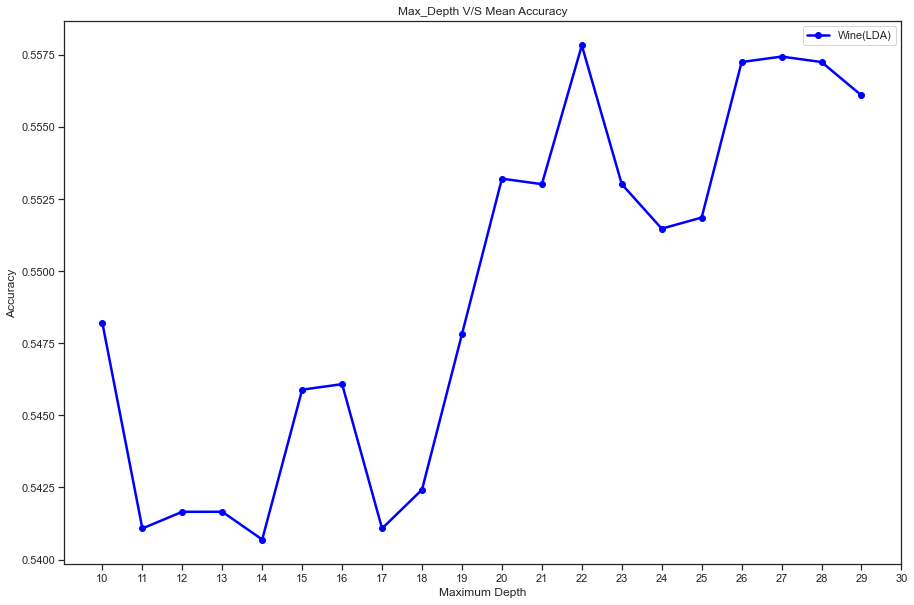

Maximum Accuracy of the model with Abalone(LDA) dataset is  0.5578224254090471  with parameters  {'max_depth': 22}


In [394]:
plt.figure(figsize=[15, 10])

plt.plot(dt_data_wineL.param_max_depth, dt_data_wineL.mean_test_score,'o-',linewidth=2.5,color = 'blue',label = 'Wine(LDA)')
plt.title("Max_Depth V/S Mean Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10,31))
plt.legend()
plt.show()

print('Maximum Accuracy of the model with Abalone(LDA) dataset is ',gsc_wineL_score_dt,' with parameters ',gsc_wineL_params_dt)


In [395]:
#Using the best parameters from above to calculate the accuracy of the testing set
test_wineL_accuracy_score_dt = getAccuracyScore(DecisionTreeClassifier(max_depth = 22,random_state = 27),
                                                X_train_wineL,y_train_wineL,X_test_wineL,y_test_wineL)
print('Testing Accuracy Score using Best Parameters is -> ',test_wineL_accuracy_score_dt)


Testing Accuracy Score using Best Parameters is ->  0.5446153846153846


### Visualization of Wine dataset for a range of parameter values

NameError: name 'dt_data_wineP' is not defined

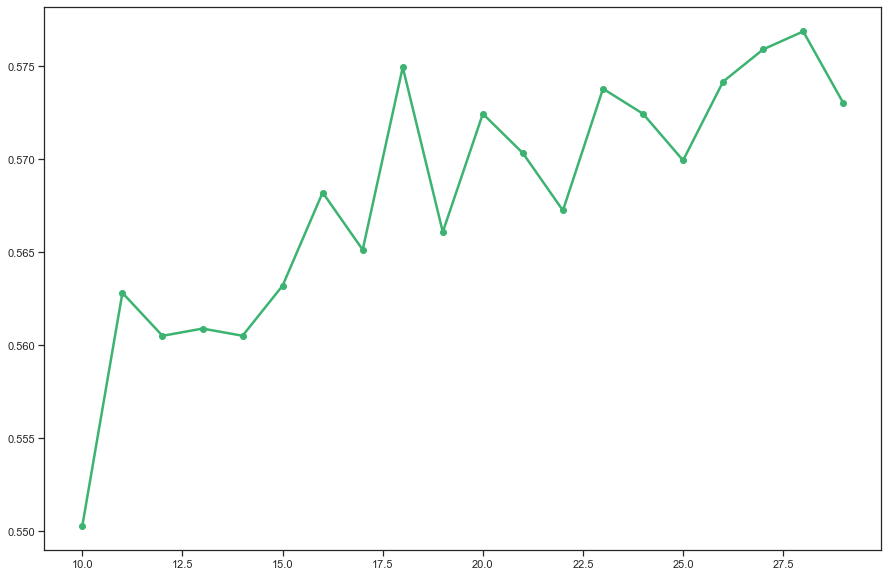

In [396]:
plt.figure(figsize=[15, 10])

plt.plot(dt_data_wineR.param_max_depth, dt_data_wineR.mean_test_score,'o-',linewidth=2.5,color = 'mediumseagreen',label = 'Wine(Raw)')
plt.plot(dt_data_wineP.param_max_depth, dt_data_wineP.mean_test_score,'o-',linewidth=2.5,color = 'deeppink',label = 'Wine(PCA)')
plt.plot(dt_data_wineL.param_max_depth, dt_data_wineL.mean_test_score,'o-',linewidth=2.5,color = 'blue',label = 'Wine(LDA)')

plt.title("Max_Depth V/S Mean Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")

plt.xticks(np.arange(10,31))
plt.legend()
plt.show()

print('Maximum Accuracy of the model with Abalone(Raw) dataset is ',gsc_wineR_dt.best_score_,' with parameters ',gsc_wineR_dt.best_params_)
print('Maximum Accuracy of the model with Abalone(PCA) dataset is ',gsc_wineP_dt.best_score_,' with parameters ',gsc_wineP_dt.best_params_)
print('Maximum Accuracy of the model with Abalone(LDA) dataset is ',gsc_wineL_dt.best_score_,' with parameters ',gsc_wineL_dt.best_params_)


In [542]:
from sklearn import tree

plt.figure(figsize=(250, 100))    
clf_wine = DecisionTreeClassifier(max_depth = 2, random_state=27)
clf_wine = clf_wine.fit(X_train_wineL,y_train_wineL)
tree.plot_tree(clf_wine,fontsize=150,filled=True,precision=3,feature_names=DC)
plt.title("Interpretation of Decision Trees using Library Functions in Wine Dataset with max_depth:2",fontsize=130)
plt.show()

The above decison tree explains the splitting rules and conditions followed at each step to select the best feature to consider based on the Gini Impurity Value.
1. 'fixed acidity' with decision boundary value of 0.571 is considered as the root node based on the minimum Gini Impurity value when calculated among other values for decision boundary.
2. There are 5197 samples in total and the value arrray = [23,169,1704] describes the repartition of the types of winw among the unique possible classes of quality.
3. The class of quality corresponding to the maximum value in the array is selected as the class for that particular node.
4. If the classification of the variable being tested is correct the flow then moves to the left of the tree and the next best split is calculated for each node until the leaf node is attained i.e with depth of tree as 2 in the above case.

## REFERENCES :



[1] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

[2] https://pypi.org/project/missingno/

[3] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

[4] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

[5] https://archive.ics.uci.edu/ml/datasets/abalone

[6] https://scikit-learn.org/stable/modules/model_evaluation.html

[7]https://pandas.pydata.org/
    
[8]https://archive.ics.uci.edu/ml/datasets/wine    
